# Unsupervised Learning: Trade&Ahead



### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#to visualize the elbow curve and silhouette scores. First install the package using pip
#!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer,InterclusterDistance

#To compare the speed of the clustering methods
import time
# To supress warnings
import warnings

warnings.filterwarnings("ignore")


## Data Overview

- Observations
- Sanity checks

In [2]:
stocks_df=pd.read_csv("stock_data.csv")
data=stocks_df.copy()
# fixing column names
data.columns = [c.replace(" ", "_") for c in data.columns]
data.sample(10)

,Ticker_Symbol,Security,GICS_Sector,GICS_Sub_Industry,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio
264,REGN,Regeneron,Health Care,Biotechnology,542.869995,16.995320,1.802345,17,129,160383000,636056000,6.17,1.030885e+08,87.985412,20.409000
334,XYL,Xylem Inc.,Industrials,Industrial Conglomerates,36.500000,11.009729,1.166311,16,83,17000000,340000000,1.88,1.808511e+08,19.414894,4.130471
39,BA,Boeing Company,Industrials,Aerospace & Defense,144.589996,10.105078,1.155905,82,24,-431000000,5176000000,7.52,6.882979e+08,19.227393,22.032612
209,MMC,Marsh & McLennan,Financials,Insurance Brokers,55.450001,6.022948,1.034162,25,99,-584000000,1599000000,3.01,5.312292e+08,18.421927,-1.950194
153,HES,Hess Corporation,Energy,Integrated Oil & Gas,48.480000,-4.585713,2.398580,16,103,272000000,-3056000000,-10.78,2.834879e+08,28.407929,6.264817
108,EMN,Eastman Chemical,Materials,Diversified Chemicals,67.510002,3.654238,1.404508,22,14,79000000,848000000,5.71,1.485114e+08,11.823118,-12.308821
110,EQIX,Equinix,Real Estate,REITs,302.399994,10.019650,1.308082,7,164,1617921000,187774000,3.25,5.777662e+07,93.046152,23.856728
74,CNP,CenterPoint Energy,Utilities,MultiUtilities,18.360001,1.436470,1.389867,20,43,-34000000,-692000000,-1.61,4.298137e+08,17.313076,0.516503
41,BAX,Baxter International Inc.,Health Care,Health Care Equipment,38.150002,16.702365,1.204526,11,128,-712000000,968000000,1.78,5.438202e+08,21.432585,8.637045
149,HBAN,Huntington Bancshares,Financials,Banks,11.060000,4.143126,1.337793,11,99,-373409000,692957000,0.82,8.450695e+08,13.487805,-0.065057


In [3]:
data.shape


(340, 15)

#### Observation
* The dataset has 340 rows and 15 columns


In [4]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
Current_Price,340.0,8.086234e+01,9.805509e+01,4.500000e+00,3.855500e+01,5.970500e+01,9.288000e+01,1.274950e+03
Price_Change,340.0,4.078194e+00,1.200634e+01,-4.712969e+01,-9.394838e-01,4.819505e+00,1.069549e+01,5.505168e+01
Volatility,340.0,1.525976e+00,5.917984e-01,7.331632e-01,1.134878e+00,1.385593e+00,1.695549e+00,4.580042e+00
ROE,340.0,3.959706e+01,9.654754e+01,1.000000e+00,9.750000e+00,1.500000e+01,2.700000e+01,9.170000e+02
Cash_Ratio,340.0,7.002353e+01,9.042133e+01,0.000000e+00,1.800000e+01,4.700000e+01,9.900000e+01,9.580000e+02
Net_Cash_Flow,340.0,5.553762e+07,1.946365e+09,-1.120800e+10,-1.939065e+08,2.098000e+06,1.698108e+08,2.076400e+10
Net_Income,340.0,1.494385e+09,3.940150e+09,-2.352800e+10,3.523012e+08,7.073360e+08,1.899000e+09,2.444200e+10
Earnings_Per_Share,340.0,2.776662e+00,6.587779e+00,-6.120000e+01,1.557500e+00,2.895000e+00,4.620000e+00,5.009000e+01
Estimated_Shares_Outstanding,340.0,5.770283e+08,8.458496e+08,2.767216e+07,1.588482e+08,3.096751e+08,5.731175e+08,6.159292e+09
P/E_Ratio,340.0,3.261256e+01,4.434873e+01,2.935451e+00,1.504465e+01,2.081988e+01,3.176476e+01,5.280391e+02


#### Observations
* There is a large difference in scales used in the data. For example the difference between the means of Net_Income and volatility is in the magnitude of 1e+9
* Scaling will be required before applying any clustering techniques

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker_Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS_Sector                   340 non-null    object 
 3   GICS_Sub_Industry             340 non-null    object 
 4   Current_Price                 340 non-null    float64
 5   Price_Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash_Ratio                    340 non-null    int64  
 9   Net_Cash_Flow                 340 non-null    int64  
 10  Net_Income                    340 non-null    int64  
 11  Earnings_Per_Share            340 non-null    float64
 12  Estimated_Shares_Outstanding  340 non-null    float64
 13  P/E_R

#### Observations
* There are 7 float type, 4 integer type and 4 object type columns
* No null values

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

#### Univariate Analysis

In [6]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

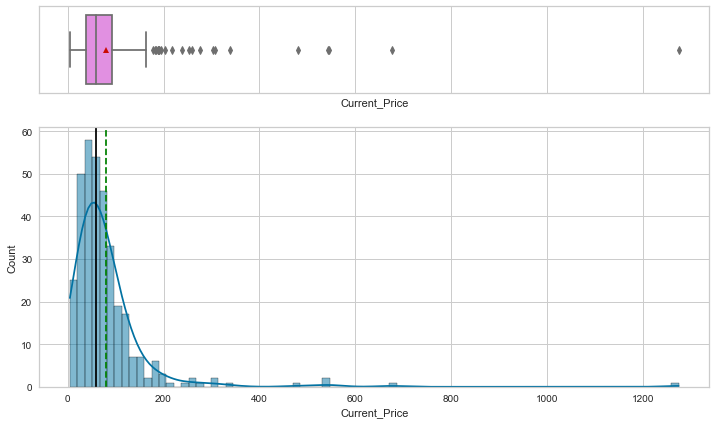

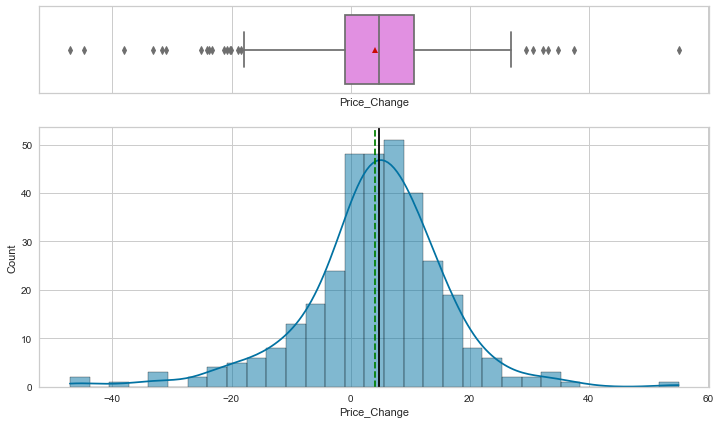

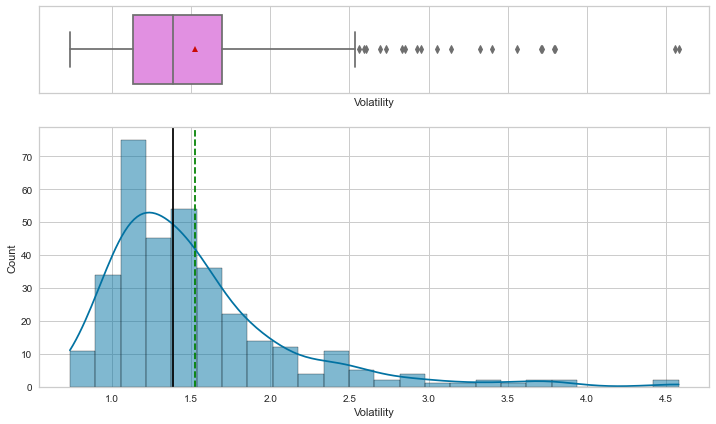

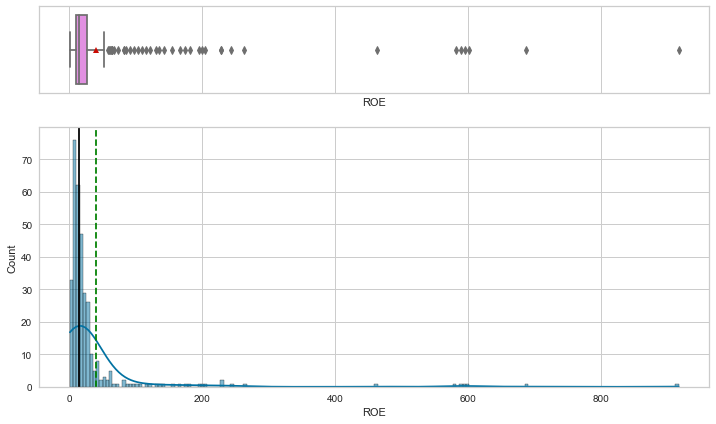

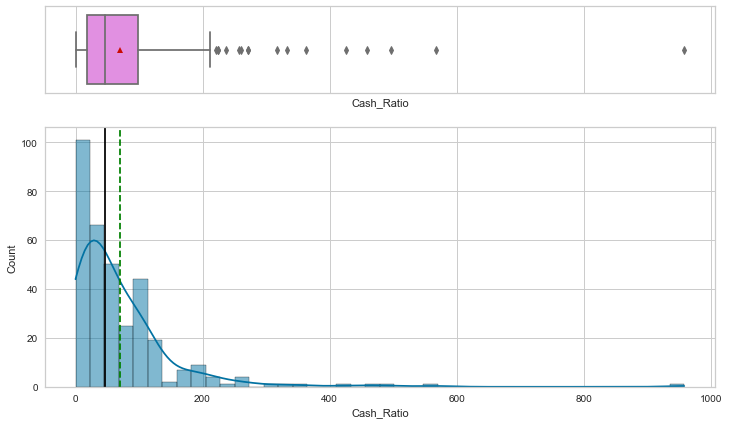

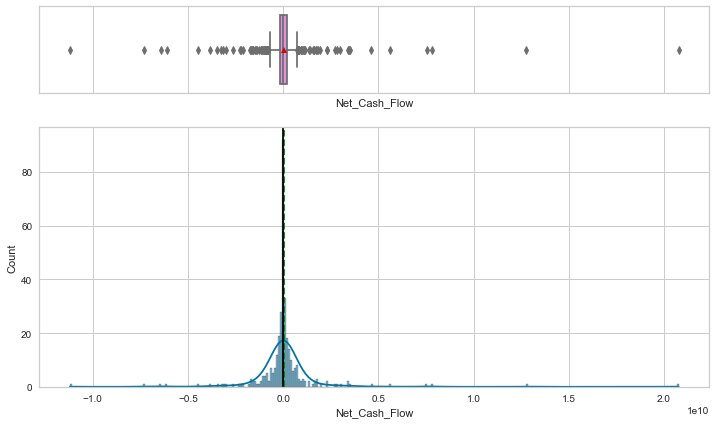

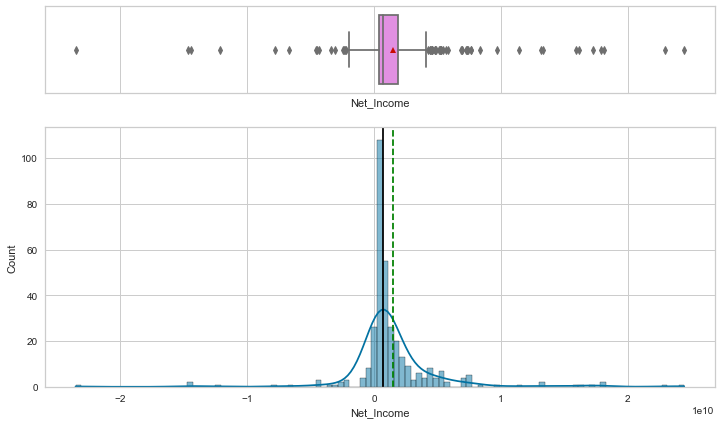

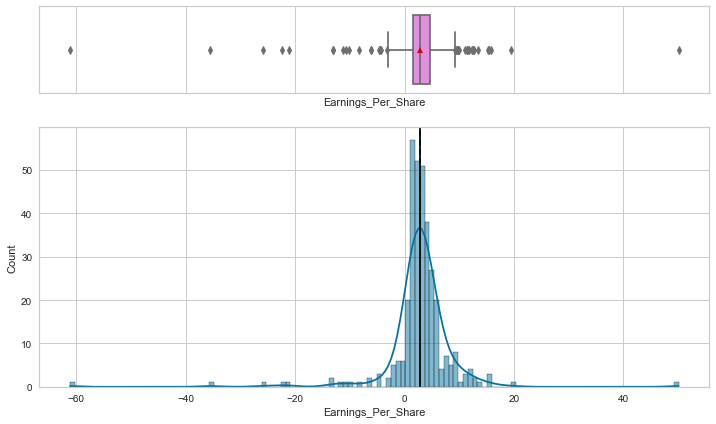

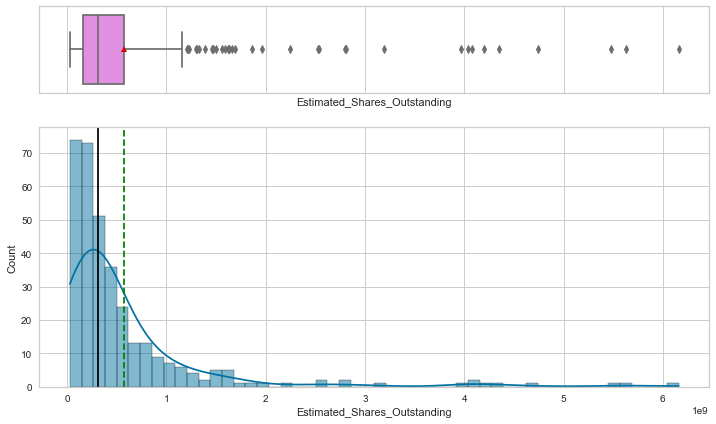

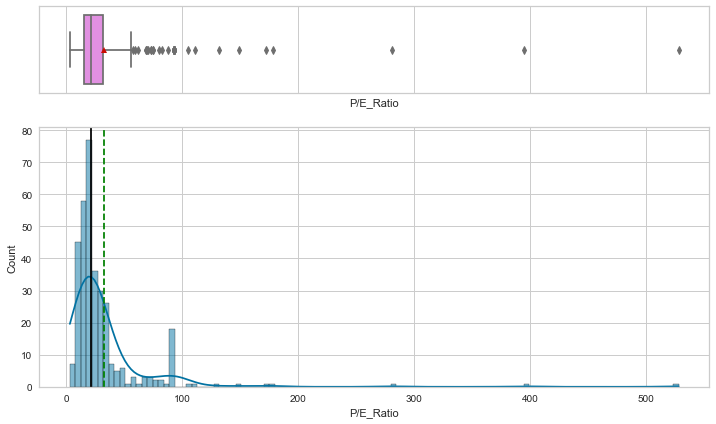

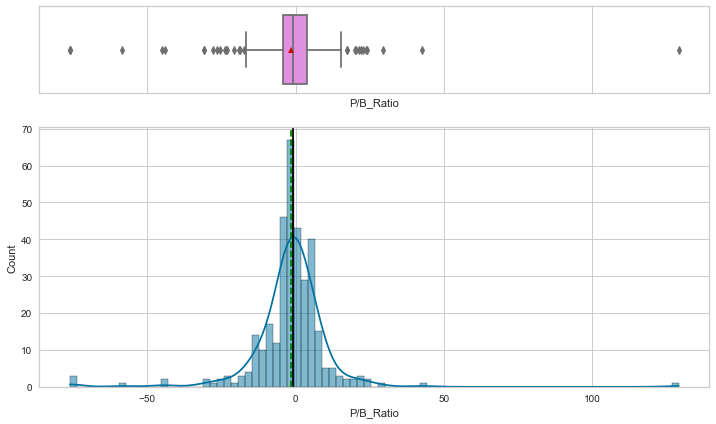

In [7]:
#Only for the numeric data types   
num_col=['Current_Price', 'Price_Change', 'Volatility', 'ROE', 'Cash_Ratio',
        'Net_Cash_Flow', 'Net_Income', 'Earnings_Per_Share',
        'Estimated_Shares_Outstanding', 'P/E_Ratio', 'P/B_Ratio']
#Printing out the box and histogram plots
for feature in num_col:
    histogram_boxplot(data, feature, figsize=(12, 7), kde=True, bins=None)

#### Obsrervations
* All metrics apart from Earnings per share, Net income, Net cash flow and Price change are positively skewed normally distributed.
* Net cash flow and Price change have almost perfect normal distribution centered around 0

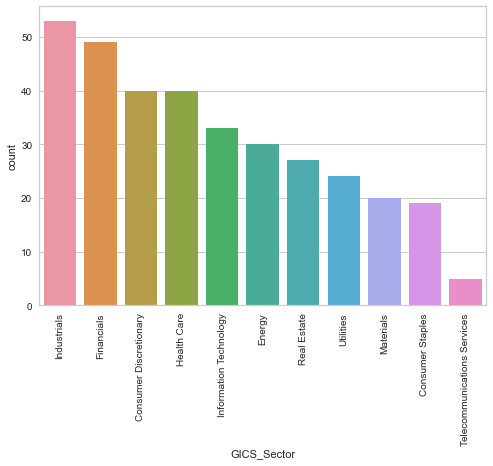

In [8]:
#Counting the number of sectors
sns.countplot(data=data, x="GICS_Sector",order=data.GICS_Sector.value_counts().index);
plt.xticks(rotation=90);

#### Observations
* Industries is the most common sector in the dataset. This is followed by Financial. Healthcare and consumer discretionary sectors. 
* Telecommunication industries had the least number of companies.

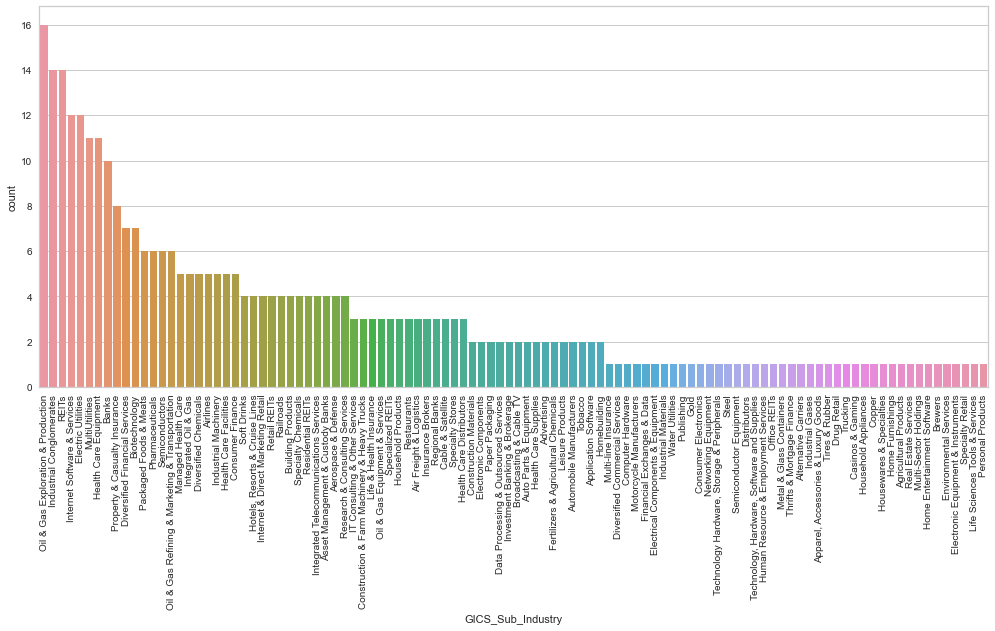

In [9]:

plt.figure(figsize=(17, 7))
sns.countplot(data=data, x="GICS_Sub_Industry",order=data.GICS_Sub_Industry.value_counts().index);
plt.xticks(rotation=90);

#### Observations
* The most populated subsector is the oil and gas exploration and production

#### Bivariate Analysis

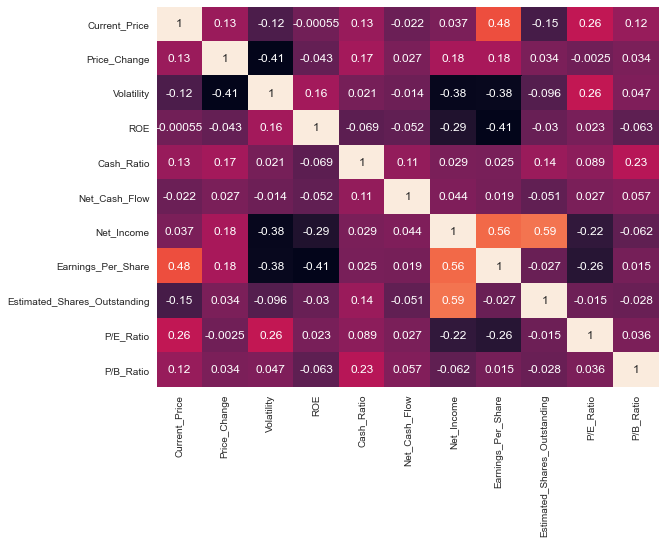

In [10]:
plt.figure(figsize=(9,7))
sns.heatmap(data=data.corr(), annot=True, cbar=False);

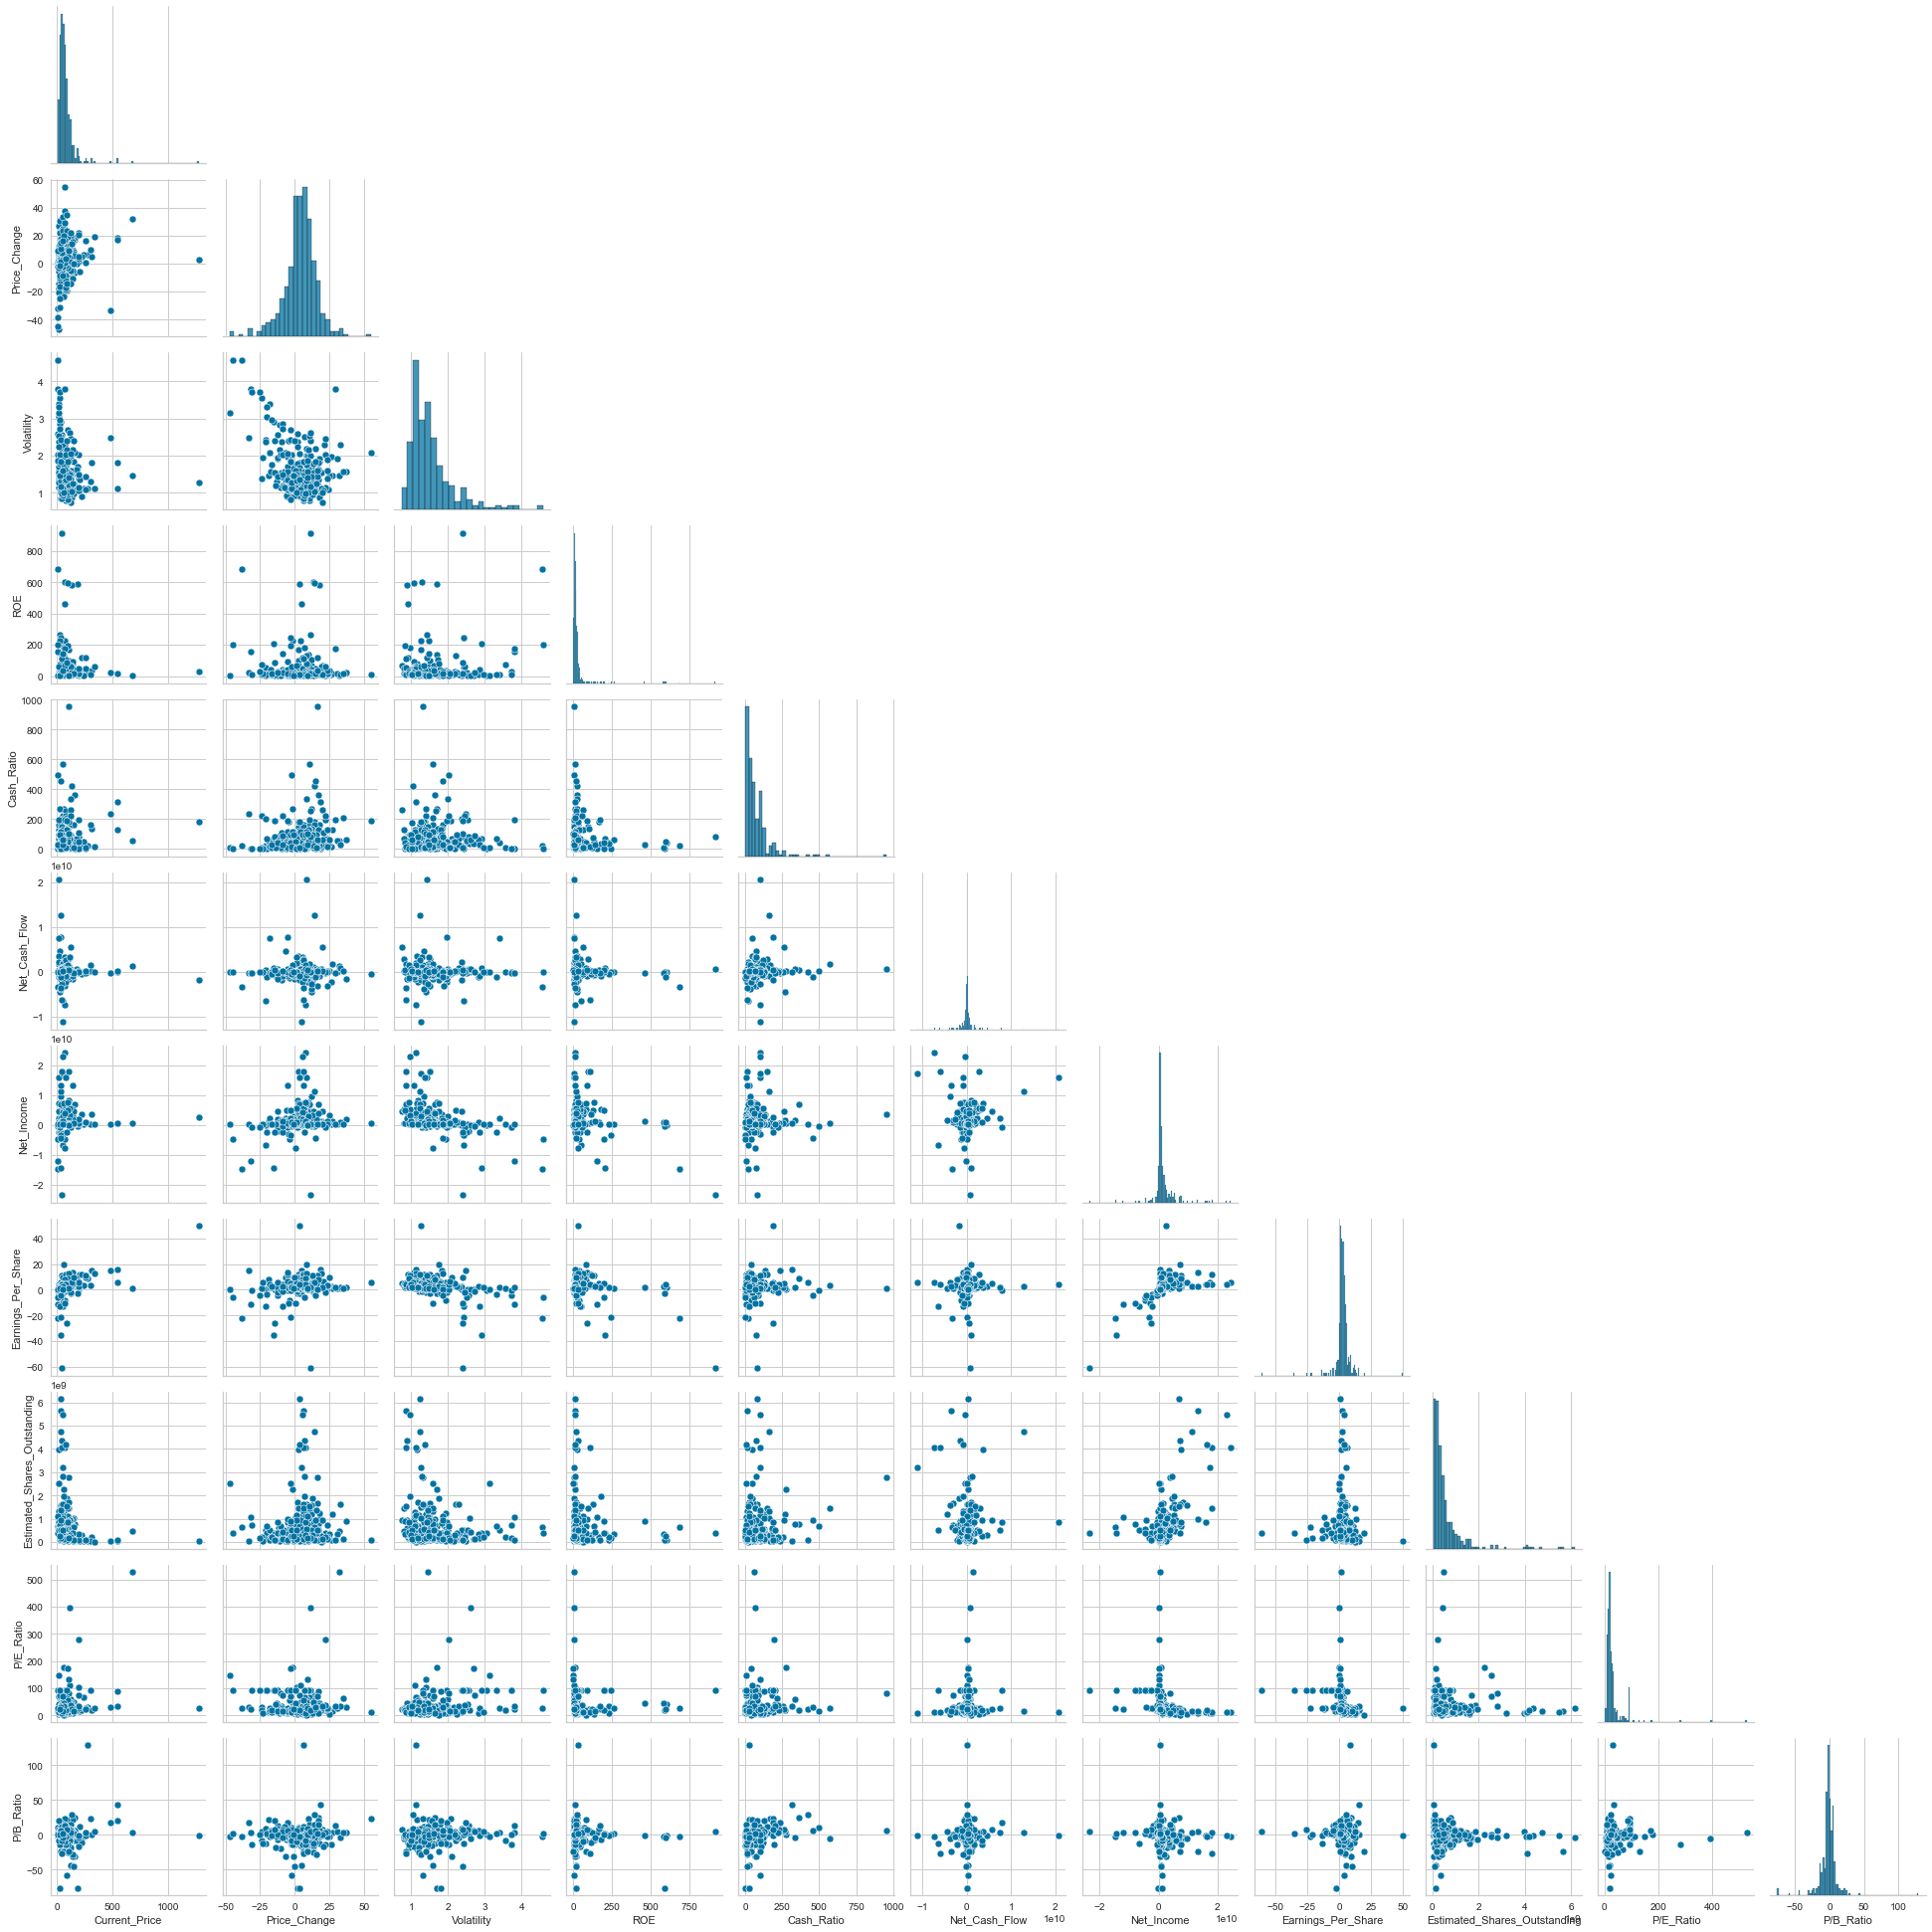

In [11]:
sns.pairplot(data=data[num_col], corner=True);

#### Observations
* There is no pair of variables with a strong positive or negative corelation(assumed to be above |0.68|)

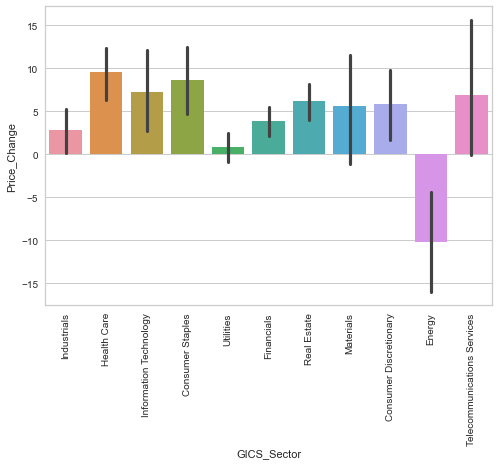

In [12]:
sns.barplot(data=data, x="GICS_Sector", y="Price_Change");
plt.xticks(rotation=90);

#### Observations
* The best perfoming sectors are:
    1. Healthcare
    2. Consumer Supplies
    3. Information Technology
* The worst perfoming sector is Energy. The stock price on average dropped by 10% in this sector. 

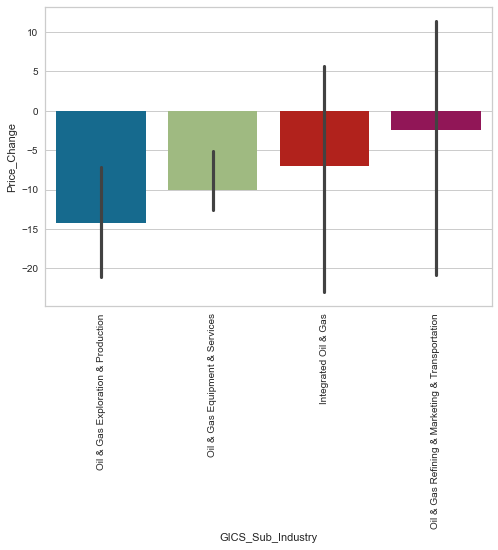

In [13]:
sns.barplot(data=data.loc[data["GICS_Sector"]=="Energy"], x="GICS_Sub_Industry", y="Price_Change");
plt.xticks(rotation=90);

#### Observations
* All subsectors in the Energy industry recorded negative price change

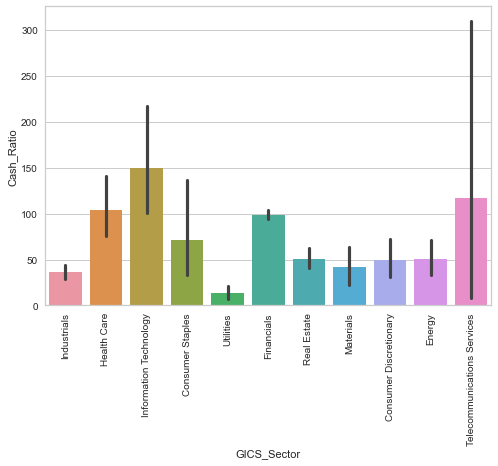

In [14]:
sns.barplot(data=data, x="GICS_Sector", y="Cash_Ratio");
plt.xticks(rotation=90);

#### Observations
* The sectors with the cash reserves to immediately address short term obligations are:
    1. Information Technology
    2. Telecommunciation Services
    3. Health care

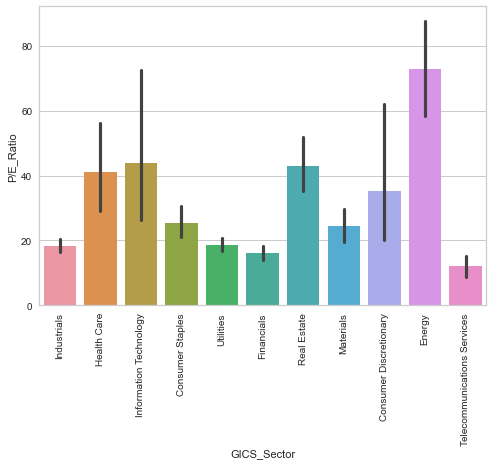

In [15]:
sns.barplot(data=data, x="GICS_Sector", y="P/E_Ratio");
plt.xticks(rotation=90);

#### Observations
* Despite having the worst relative price change, the Energy sector has the highets share price investors are wiling to buy at.

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

In [16]:
#Missing data
data.isnull().sum()

Ticker_Symbol                   0
Security                        0
GICS_Sector                     0
GICS_Sub_Industry               0
Current_Price                   0
Price_Change                    0
Volatility                      0
ROE                             0
Cash_Ratio                      0
Net_Cash_Flow                   0
Net_Income                      0
Earnings_Per_Share              0
Estimated_Shares_Outstanding    0
P/E_Ratio                       0
P/B_Ratio                       0
dtype: int64

#### Observation
* There is no missing data

In [17]:
data.duplicated().sum()

0

#### Observation
* There are no duplicated values

In [18]:
#Dropping Security and Unique ID's.
data=data.drop(["Security", "Ticker_Symbol"], axis=1)
data.sample(10)

,GICS_Sector,GICS_Sub_Industry,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio
291,Financials,Life & Health Insurance,57.160000,1.168142,1.022968,13,99,-4636000,527100000,4.21,1.252019e+08,13.577197,-1.883912
215,Health Care,Pharmaceuticals,52.820000,7.031413,1.278460,10,70,1083000000,4442000000,1.58,2.811392e+09,33.430380,-4.282931
263,Consumer Discretionary,"Hotels, Resorts & Cruise Lines",101.209999,13.425973,1.556512,8,9,-67676000,665783000,3.03,2.197304e+08,33.402640,-15.727480
67,Consumer Staples,Household Products,66.620003,4.781379,0.895471,463,27,-119000000,1384000000,1.53,9.045752e+08,43.542486,-0.548324
196,Real Estate,Residential REITs,90.809998,10.622490,1.177776,12,47,10906000,350745000,4.41,7.953401e+07,20.591836,-3.089477
285,Financials,Consumer Finance,30.410000,-2.874478,1.835028,18,99,497000000,2214000000,2.66,8.323308e+08,11.432331,-0.842213
90,Health Care,Health Care Facilities,71.139999,15.674795,1.381490,15,11,-59000000,709000000,4.92,1.441057e+08,14.459349,-4.552214
156,Industrials,Industrial Conglomerates,103.570000,9.320247,1.103449,26,41,-1504000000,4768000000,6.11,7.803601e+08,16.950900,-3.709826
75,Financials,Consumer Finance,72.180000,-0.619575,1.364592,9,99,781000000,4050000000,7.15,5.664336e+08,10.095105,-0.725643
44,Energy,Oil & Gas Equipment & Services,46.150002,-12.312367,2.559553,12,84,584000000,-1967000000,-4.49,4.380846e+08,93.089287,13.490544


In [19]:
# scaling the dataset before clustering
scaler = StandardScaler()
subset = data[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

# creating a dataframe of the scaled columns
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)
subset_scaled_df.sample(10)

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio
102,-0.499050,-1.631230,2.365301,1.715701,-0.000261,0.398488,-4.053625,-5.826417,-0.201806,1.365673,0.251239
76,-0.645203,-2.016700,2.588882,-0.348497,-0.775555,-0.039093,-0.408778,-0.464674,-0.201603,1.365673,0.107204
9,-0.214096,-0.087667,-0.808359,-0.265515,0.320933,-0.187053,0.263986,0.471769,-0.173153,-0.506408,-0.011879
236,-0.053133,0.895189,-0.777772,0.056044,-0.576194,0.083130,-0.101792,0.251340,-0.390832,-0.350776,-0.627106
254,-0.167319,-0.298569,-0.647380,-0.307006,-0.742328,-0.012171,-0.268692,0.176851,-0.551796,-0.366888,-0.313414
126,-0.259035,1.062614,-0.300679,-0.275887,-0.432210,-0.004599,-0.299766,-0.122629,-0.493876,-0.100263,-0.027424
304,0.375624,-0.217866,-0.073829,-0.234396,-0.000261,1.735251,1.097669,0.505214,0.445087,-0.300955,-0.508164
228,-0.349934,0.071161,-0.554186,-0.275887,-0.542967,0.014645,-0.234952,-0.186477,-0.247792,-0.057540,-0.764162
46,-0.404882,0.112090,-0.548826,-0.327752,0.320933,-0.251370,0.422844,-0.007094,0.686414,-0.395490,-0.114944
137,-0.778181,-0.532123,0.847552,-0.379616,4.717961,0.102116,-0.429648,-0.466194,0.117018,-0.408585,0.875924


#### Observation
* Prices of company's stock are very volatile. Influenced easily by external factors during that are time specific.
* The outliers will thus be accepted

## EDA

- It is a good idea to explore the data once again after manipulating it.

### Univariate Analysis

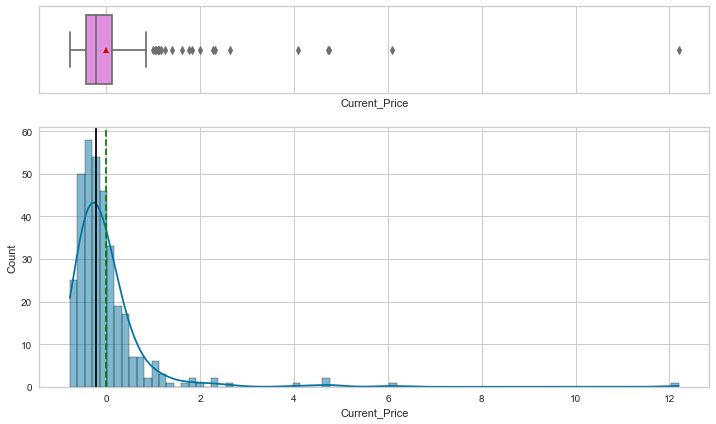

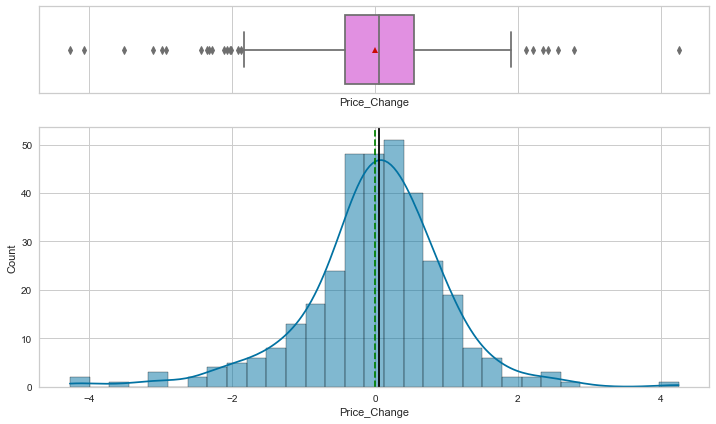

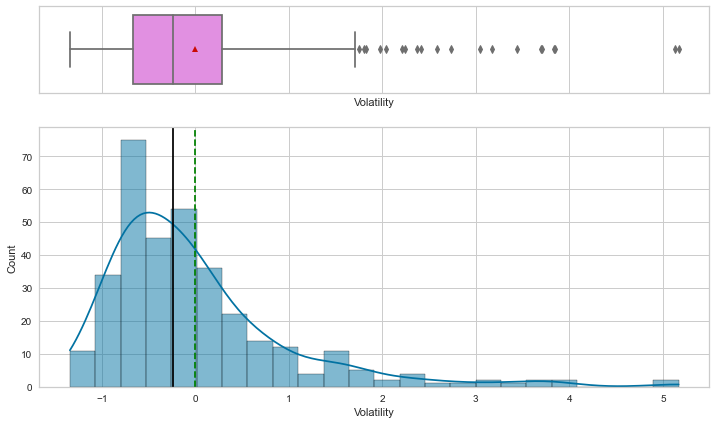

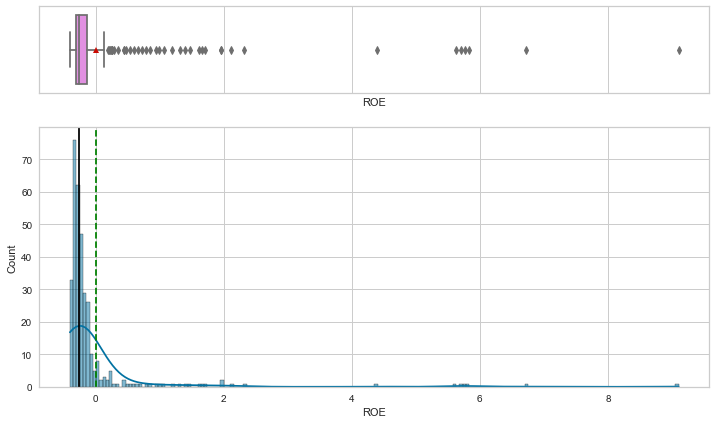

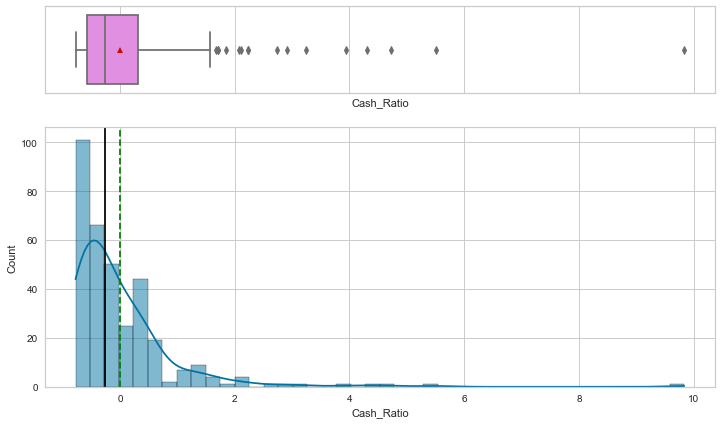

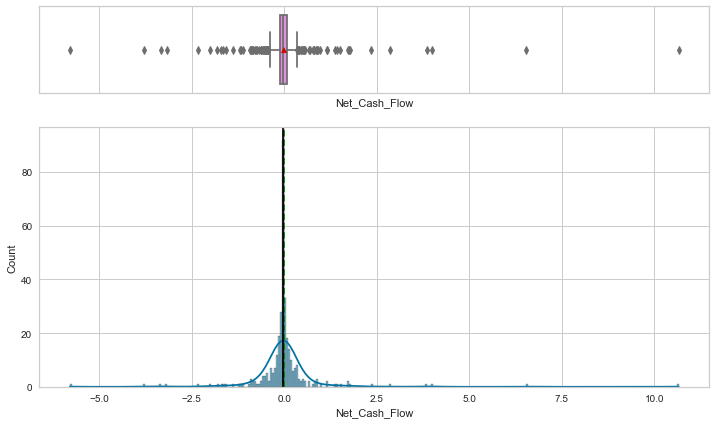

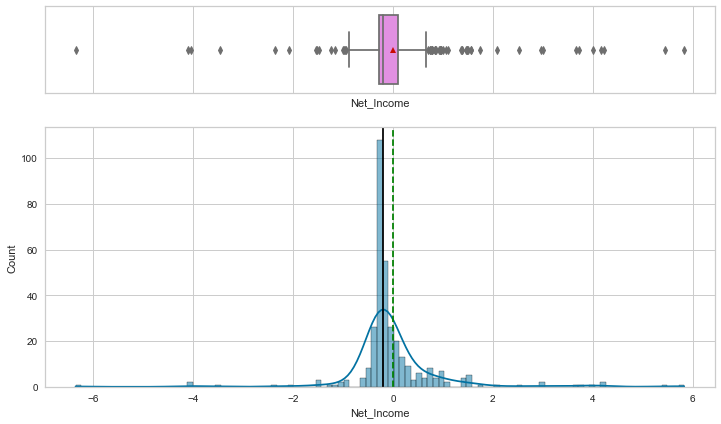

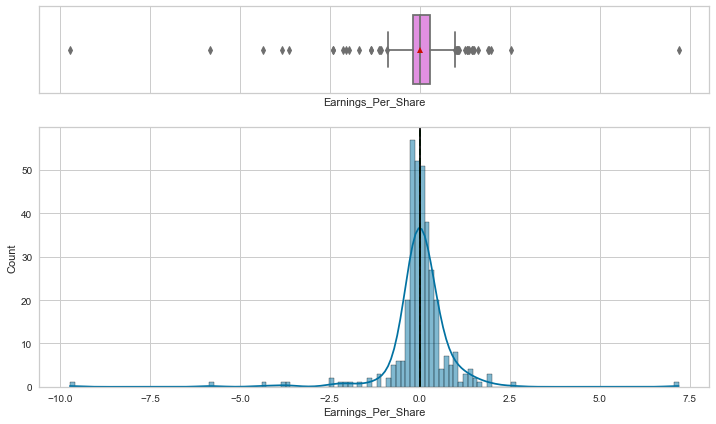

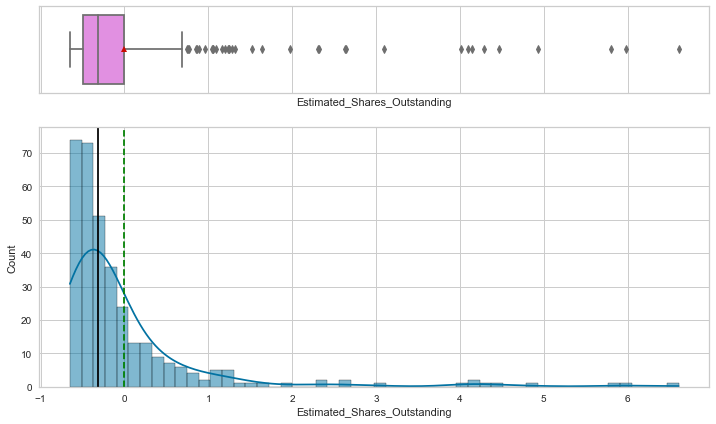

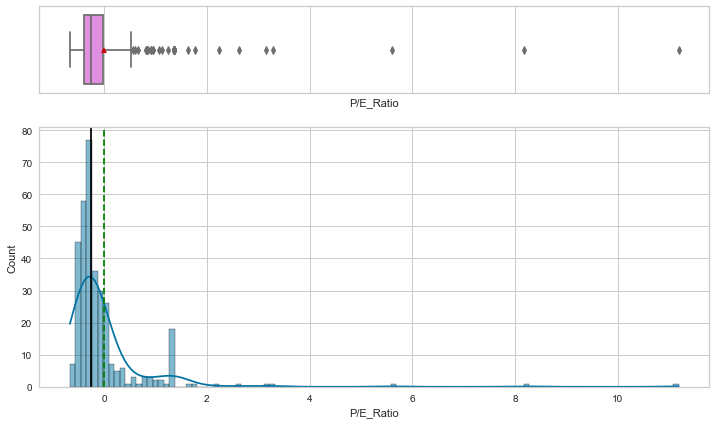

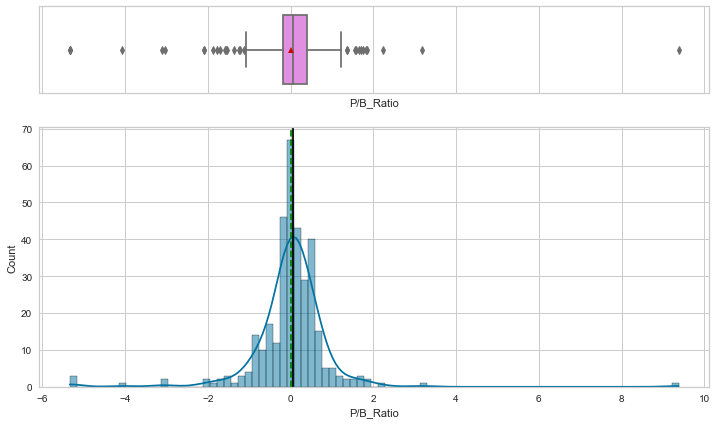

In [20]:
#Printing out the box and histogram plots
for feature in num_col:
    histogram_boxplot(subset_scaled_df, feature, figsize=(12, 7), kde=True, bins=None)

### Bivariate Analysis

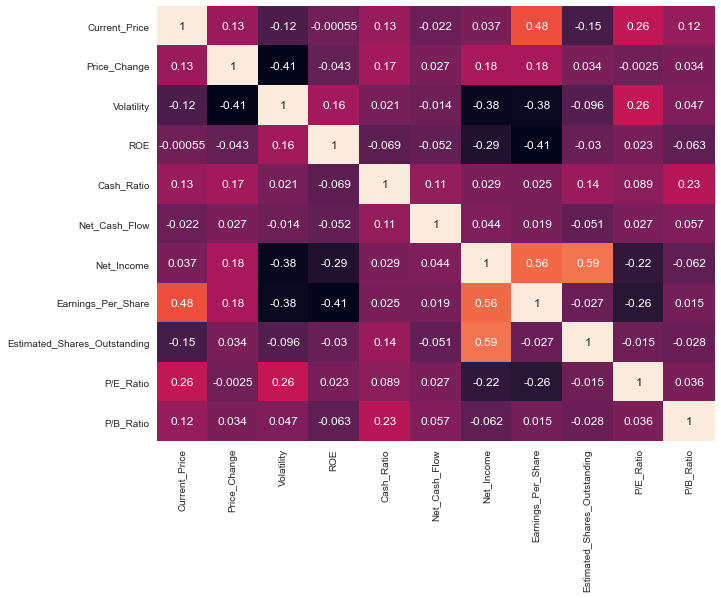

In [21]:
plt.figure(figsize=(10,8));
sns.heatmap(data=subset_scaled_df.corr(), annot=True, cbar=False);

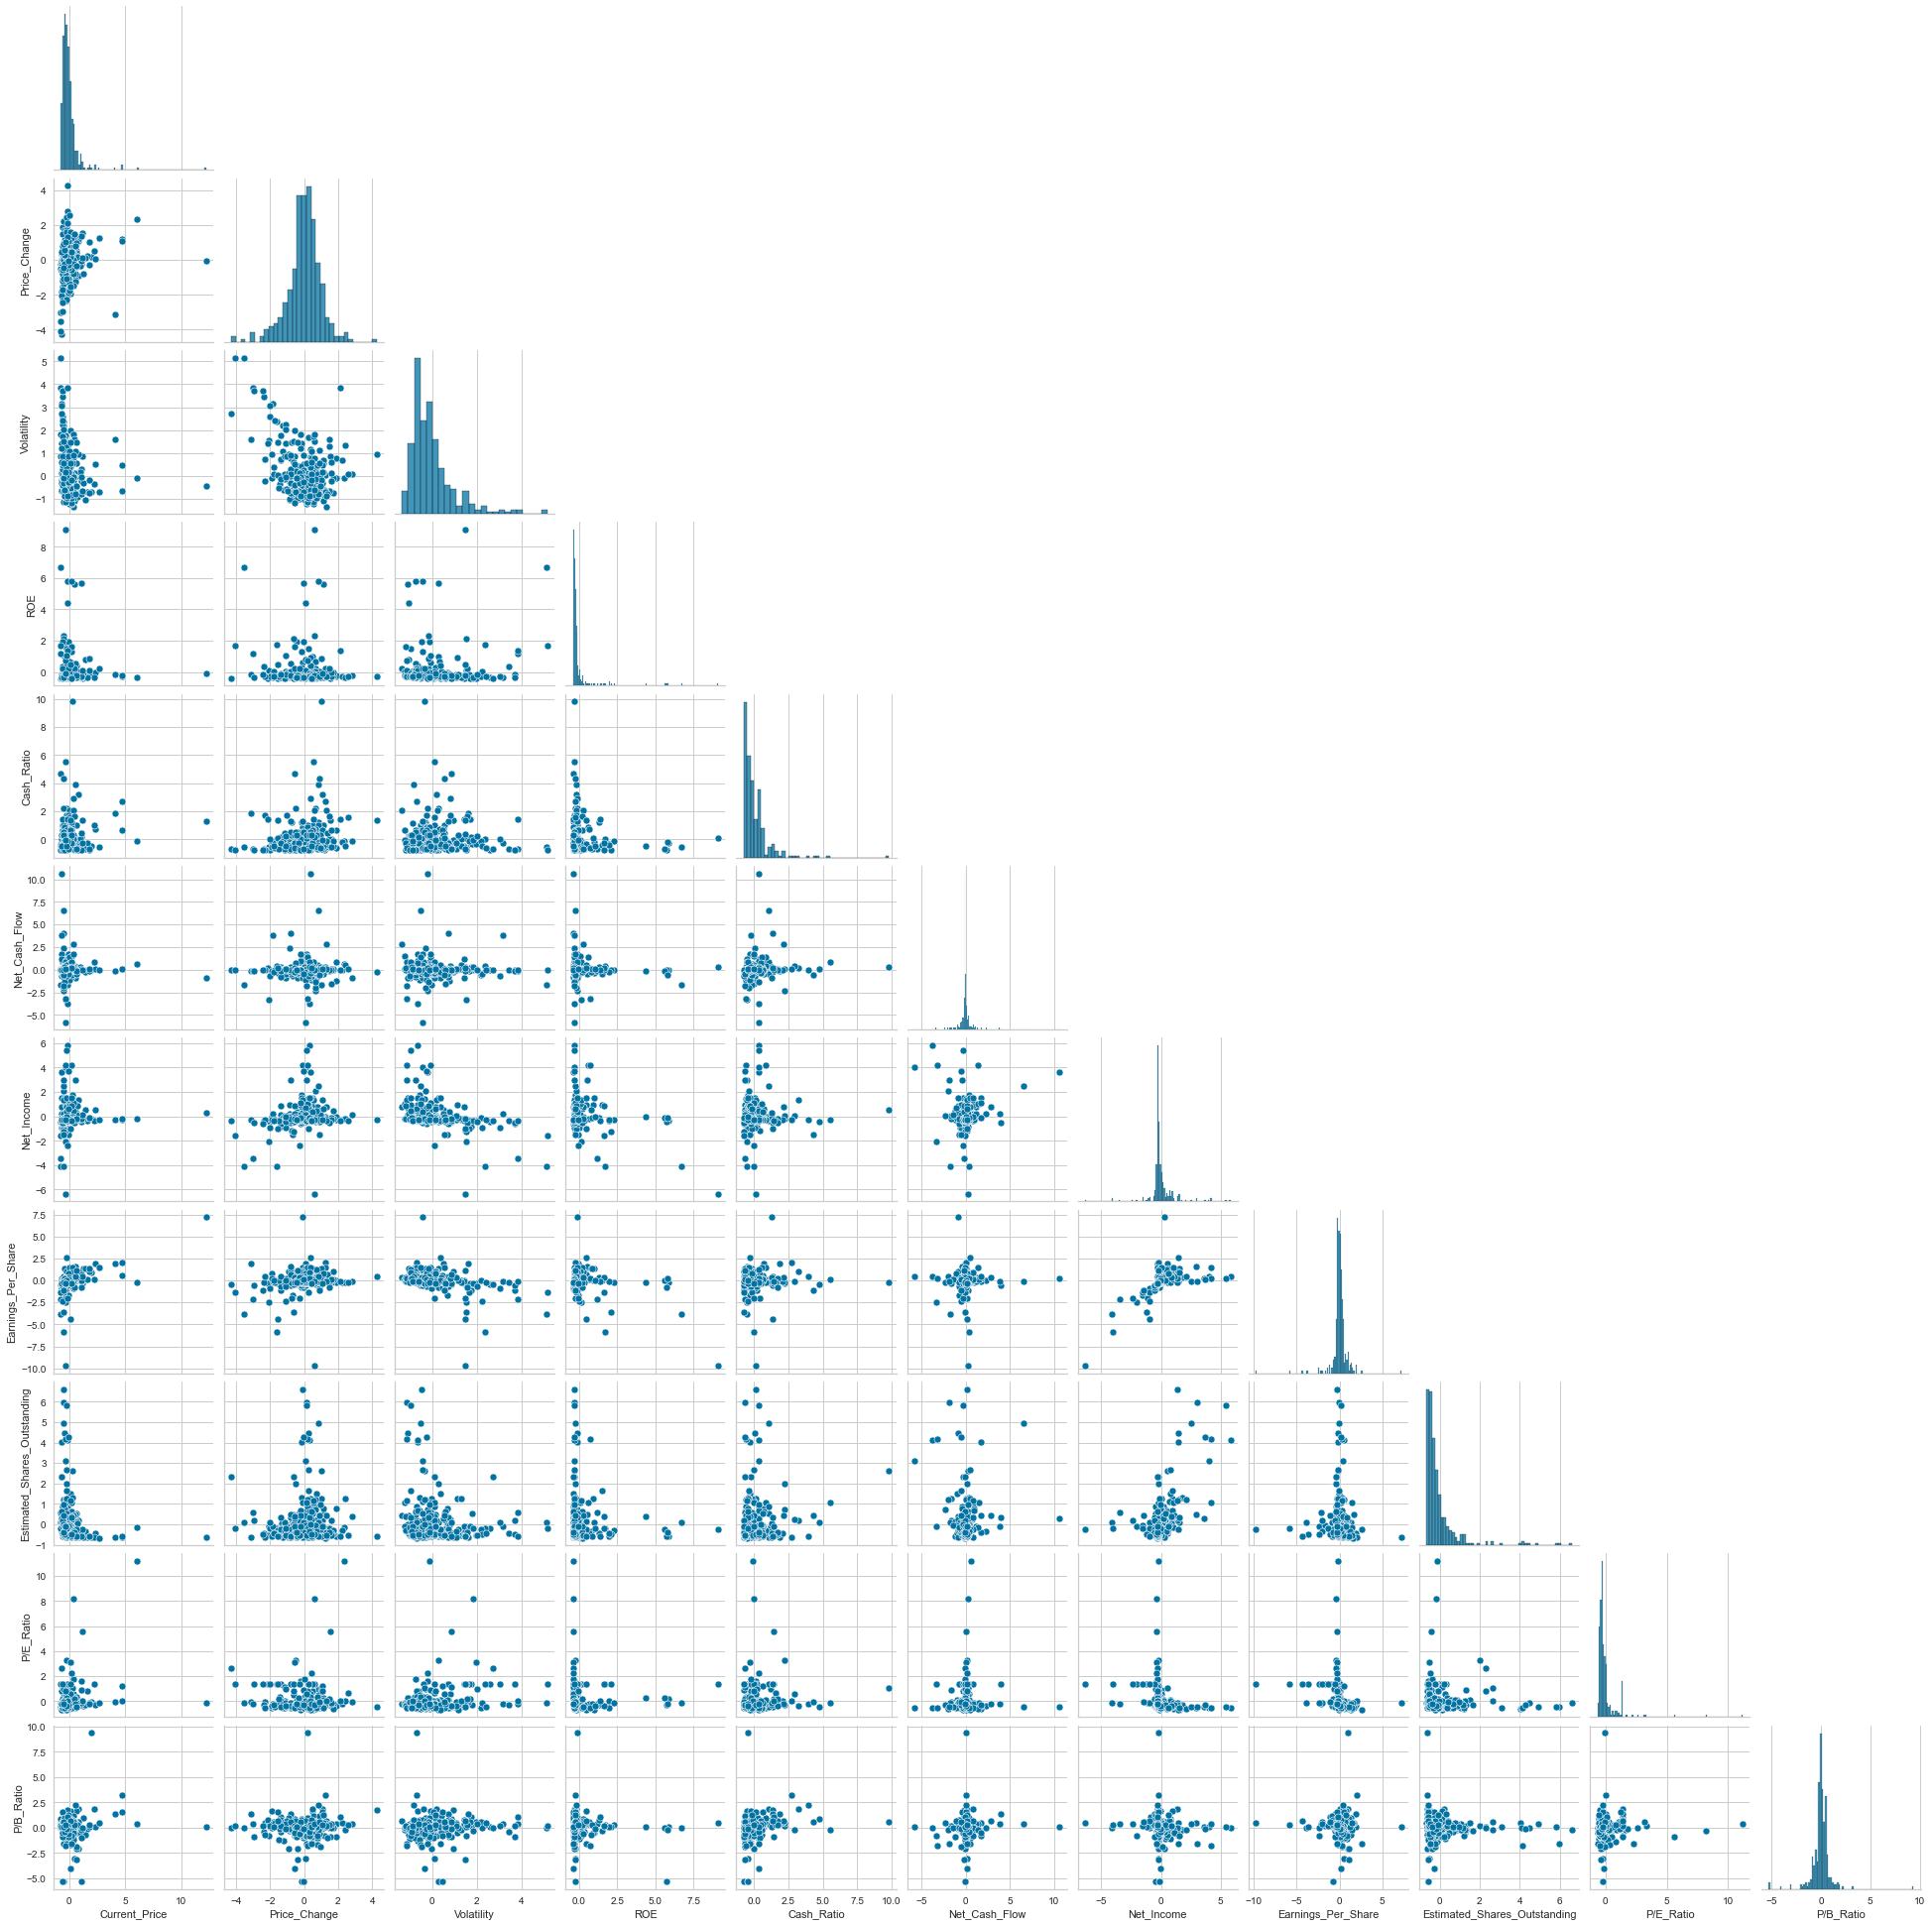

In [22]:
sns.pairplot(data=subset_scaled_df, corner=True);

#### Observations
* Scaling data did not affect the distribution of data

## K-means Clustering

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.176396791566185
Number of Clusters: 5 	Average Distortion: 2.12252183104221
Number of Clusters: 6 	Average Distortion: 2.073586582565402
Number of Clusters: 7 	Average Distortion: 2.040726854023577
Number of Clusters: 8 	Average Distortion: 1.9675620188360854
Number of Clusters: 9 	Average Distortion: 1.9298056041972917
Number of Clusters: 10 	Average Distortion: 1.8607347557142764
Number of Clusters: 11 	Average Distortion: 1.7984600376920181
Number of Clusters: 12 	Average Distortion: 1.7432594259752456
Number of Clusters: 13 	Average Distortion: 1.7515555311983058
Number of Clusters: 14 	Average Distortion: 1.7239499992174698


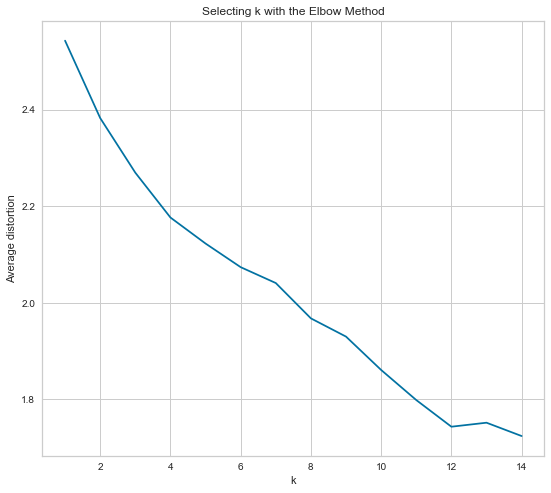

In [23]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)
plt.figure(figsize=(9,8))
plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average distortion")
plt.title("Selecting k with the Elbow Method")
plt.show()

#### Observations
* Prominent Elbows in k=7, 8, 9 and 12

For n_clusters = 2, the silhouette score is 0.43969639509980457)
For n_clusters = 3, the silhouette score is 0.45547866229080475)
For n_clusters = 4, the silhouette score is 0.4622784487377946)
For n_clusters = 5, the silhouette score is 0.43564693800945903)
For n_clusters = 6, the silhouette score is 0.4118459845534201)
For n_clusters = 7, the silhouette score is 0.40591399096223746)
For n_clusters = 8, the silhouette score is 0.4012847345639638)
For n_clusters = 9, the silhouette score is 0.401921544175838)
For n_clusters = 10, the silhouette score is 0.12419327592340472)
For n_clusters = 11, the silhouette score is 0.14317671834845527)
For n_clusters = 12, the silhouette score is 0.1798681259812058)
For n_clusters = 13, the silhouette score is 0.1637653517087994)
For n_clusters = 14, the silhouette score is 0.15271477310675086)


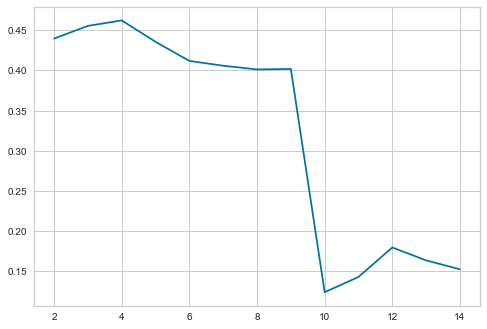

In [24]:
sil_score = []
cluster_list = list(range(2, 15))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

#### Observation
* k=4 has a better sillhoiute score than 8 and 9.

#### k=4 will be chosen

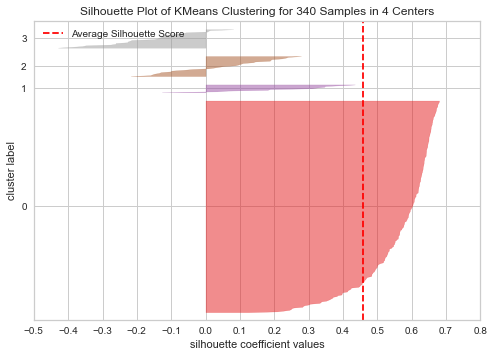

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [25]:
# finding optimal no. of clusters with silhouette coefficients
optimal_visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
optimal_visualizer.fit(subset_scaled_df)
optimal_visualizer.show()

In [26]:
# let's take 4 as number of clusters
k_means_start=time.time()
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(subset_scaled_df)
k_means_end=time.time()

In [27]:
# adding kmeans cluster labels to the original and scaled dataframes

data["K_means_segments"] = kmeans.labels_
subset_scaled_df["K_means_segments"] = kmeans.labels_


### Cluster Profiling


In [28]:
cluster_profile = subset_scaled_df.groupby("K_means_segments").mean()
cluster_profile["count_in_each_segments"] = (
   data.groupby("K_means_segments")["GICS_Sector"].count().values
)
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio,count_in_each_segments
K_means_segments,,,,,,,,,,,,
0,-0.086438,0.082414,-0.232951,-0.051617,-0.188546,-0.035803,-0.003094,0.128361,-0.163976,-0.198018,-0.117644,277
1,-0.309926,0.139248,-0.669418,-0.088233,0.065186,-0.580298,3.390319,0.209466,4.406556,-0.402159,-0.203198,11
2,-0.436756,-1.622242,2.342968,0.699929,-0.221363,-0.110608,-1.367911,-1.862300,-0.114408,1.309894,0.219435,27
3,1.565799,0.777609,0.345241,-0.145189,2.299485,0.771489,0.019883,0.496883,0.001525,0.956300,1.155908,25


In [51]:
print(len(subset_scaled_df.columns))

13


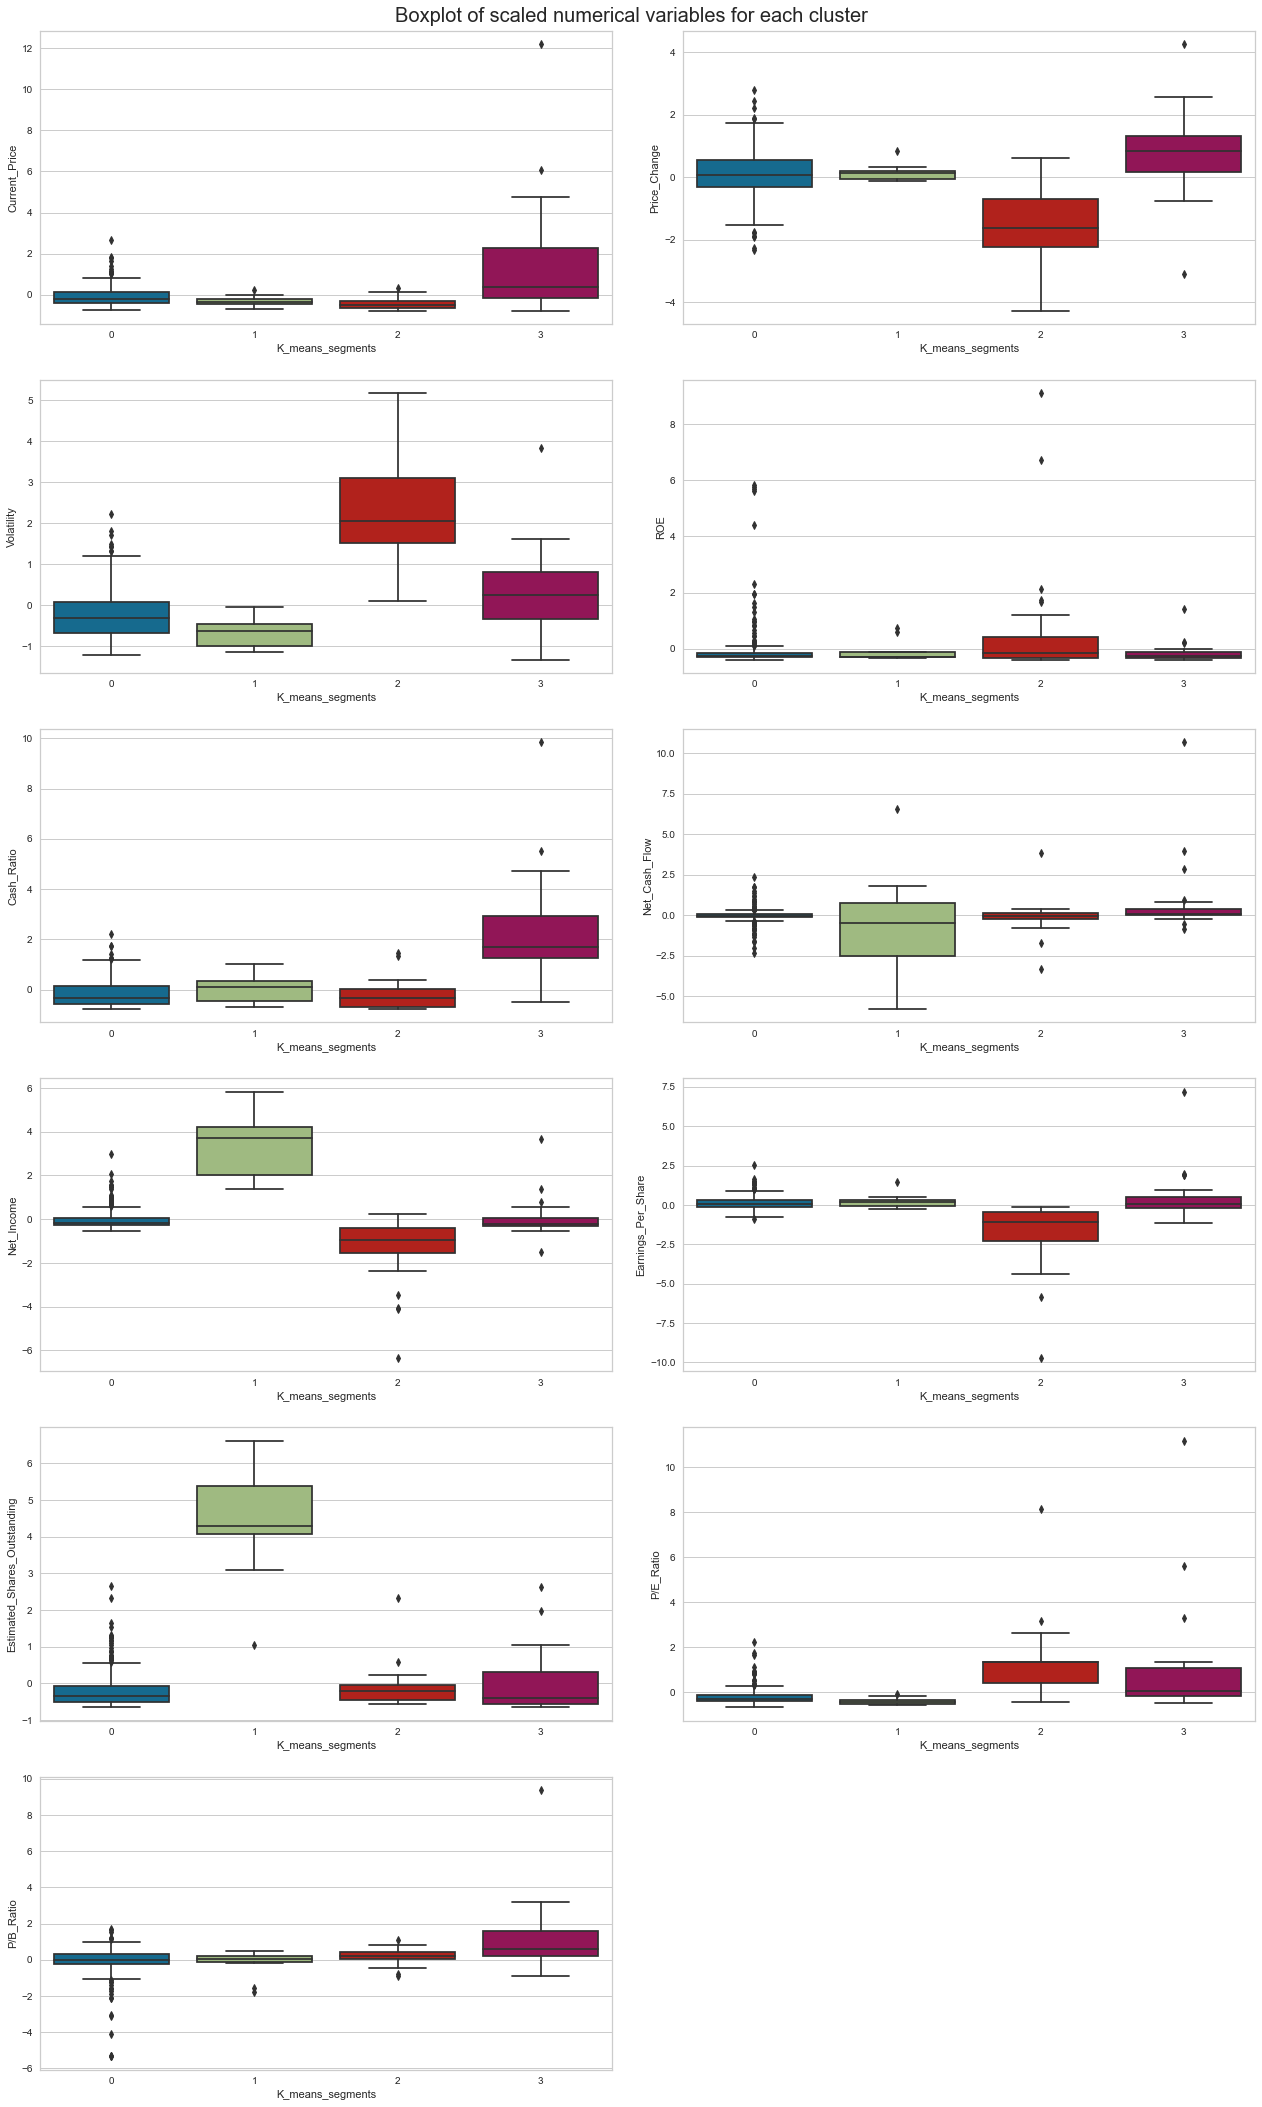

In [93]:
plt.figure(figsize=(18, 30))
plt.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)

for i, variable in enumerate(num_col):
    plt.subplot(6, 2,i+1)
    sns.boxplot(data=subset_scaled_df, x="K_means_segments", y=variable)

plt.tight_layout(pad=2.0);

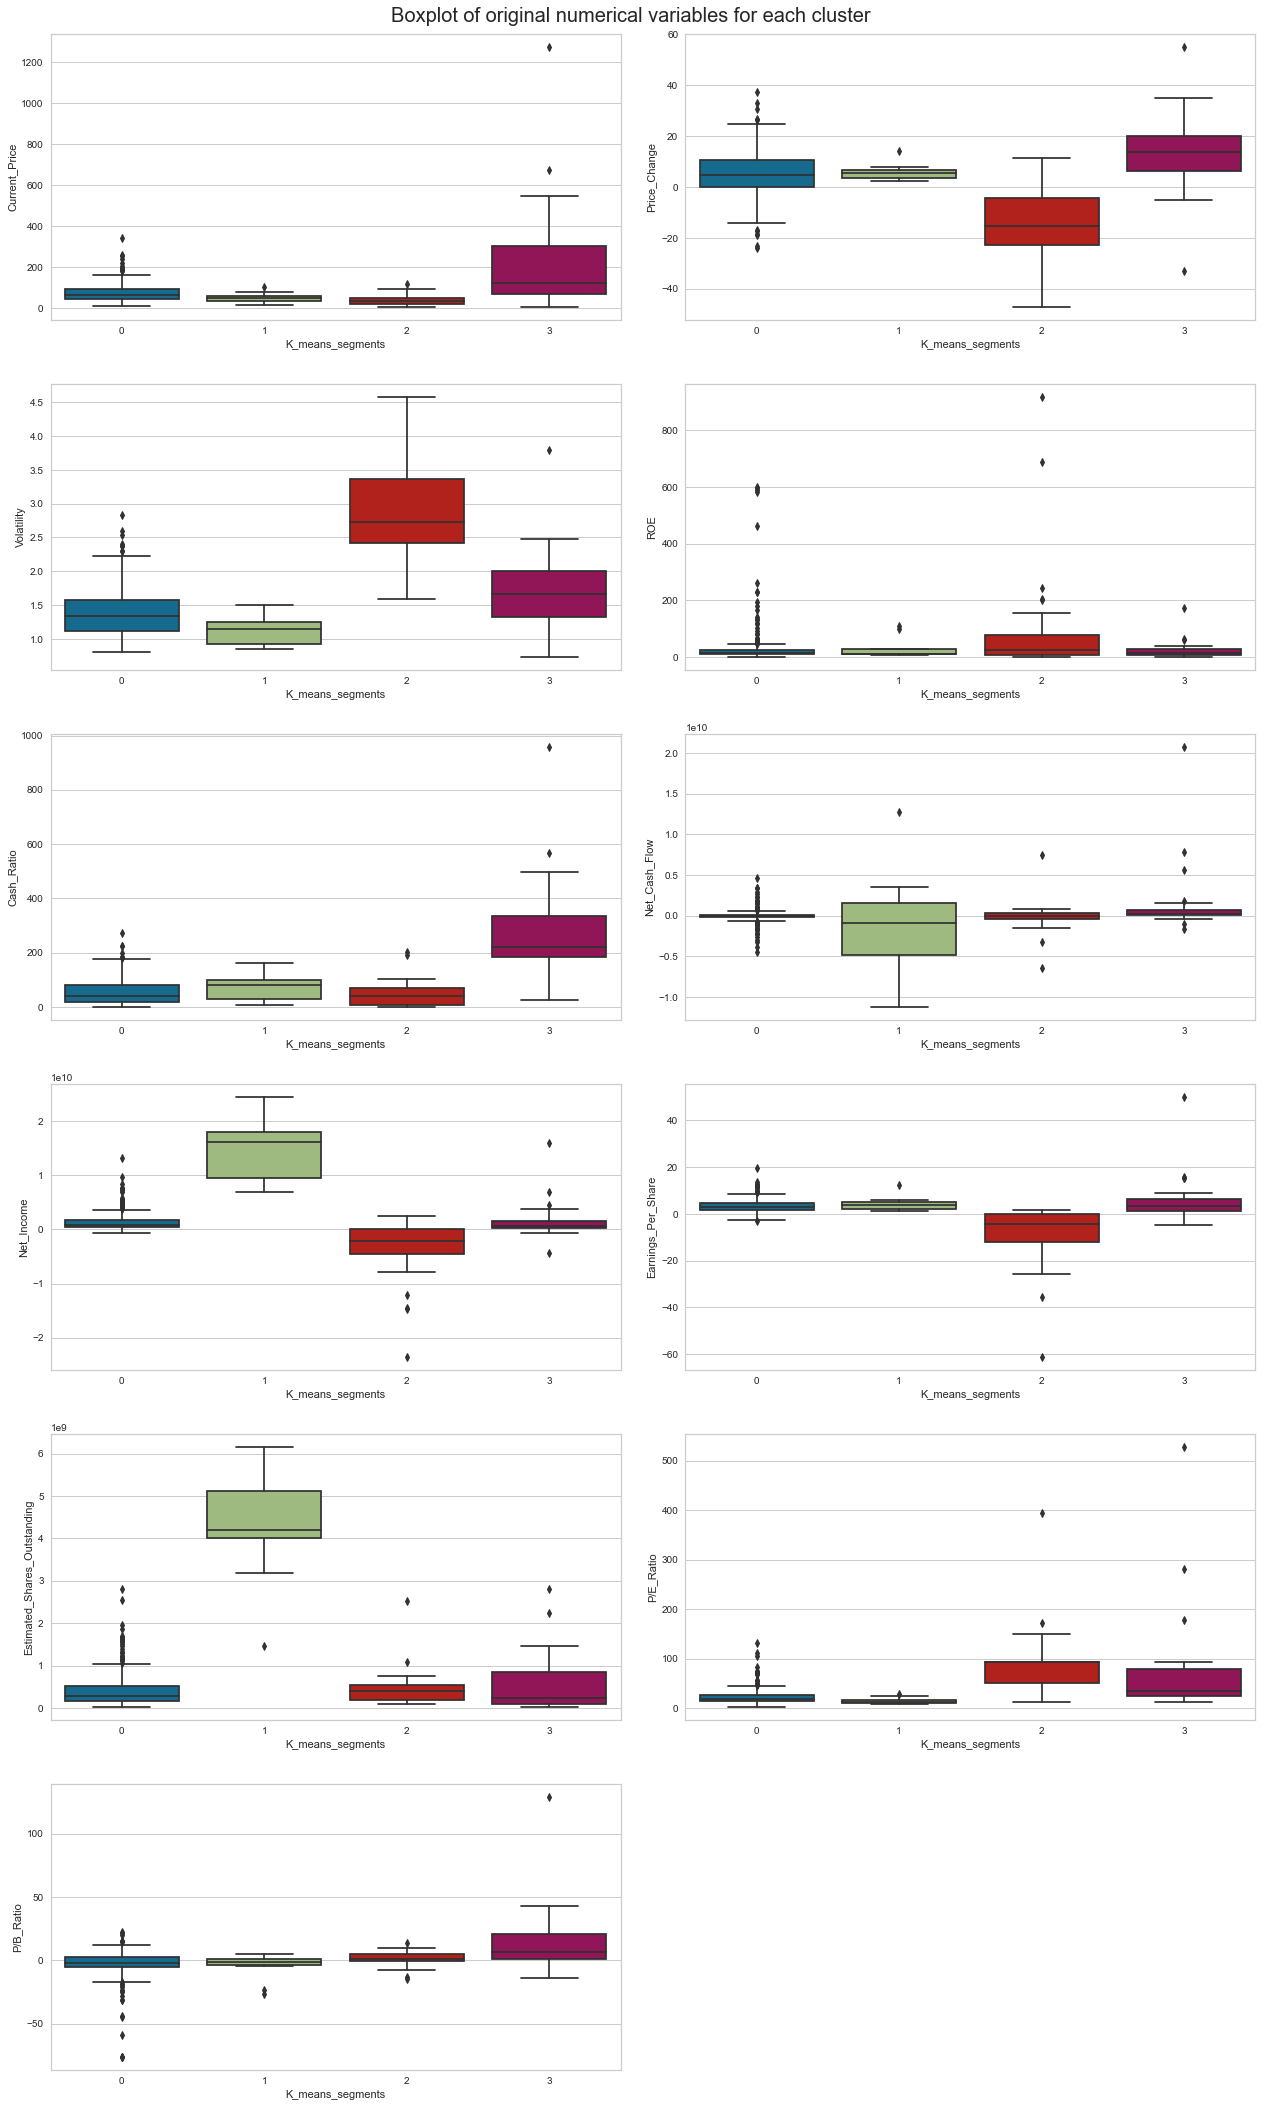

In [94]:
plt.figure(figsize=(18, 30))
plt.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)

for i, variable in enumerate(num_col):
    plt.subplot(6, 2,i+1)
    sns.boxplot(data=data, x="K_means_segments", y=variable)

plt.tight_layout(pad=2.0);

#### Observations
* There is no difference between the scaled data and normal data.


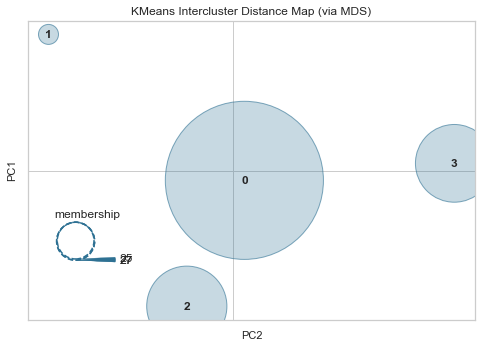

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [31]:
distance_visualizer = InterclusterDistance(kmeans, axis=3)
distance_visualizer.fit(subset_scaled_df)        # Fit the data to the distance_visualizer
distance_visualizer.show()        # Finalize and render the figure

#### Observations
* From the distance visualiser, the 4 clusters chosen are clearly defined with no overlapping.
* Cluster 0: Has the highest net_income of all clusters and has 281 members and the second lowest earnings per share out of all the clusters.
* Cluster 1: Has the highest estimated shares outstanding and the worst earnings per share. Investing into this cluster leads to losses. In addition it has the highest volatilty and return on equity but with the lowest average current share price
* Cluster 2: Has the highest number of maximum attributes. Highest in current stock price, stock price change, earnings per share, P/B ratio net cash flow and cash ratio of the clusters
* Cluster 3: Has the highest net income and Estimated shares outstanding


## Hierarchical Clustering

In [32]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9304469769832866.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8559480642212798.
Cophenetic correlation for Euclidean distance and average linkage is 0.946403836884538.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.7508819056084053.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9161627445317929.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8225020941532581.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9379218754329659.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9153206618543515.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9348505176633236.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.6881861661402056.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9360657692078034.
Cophenetic cor

In [33]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.946403836884538, which is obtained with Euclidean distance and average linkage.


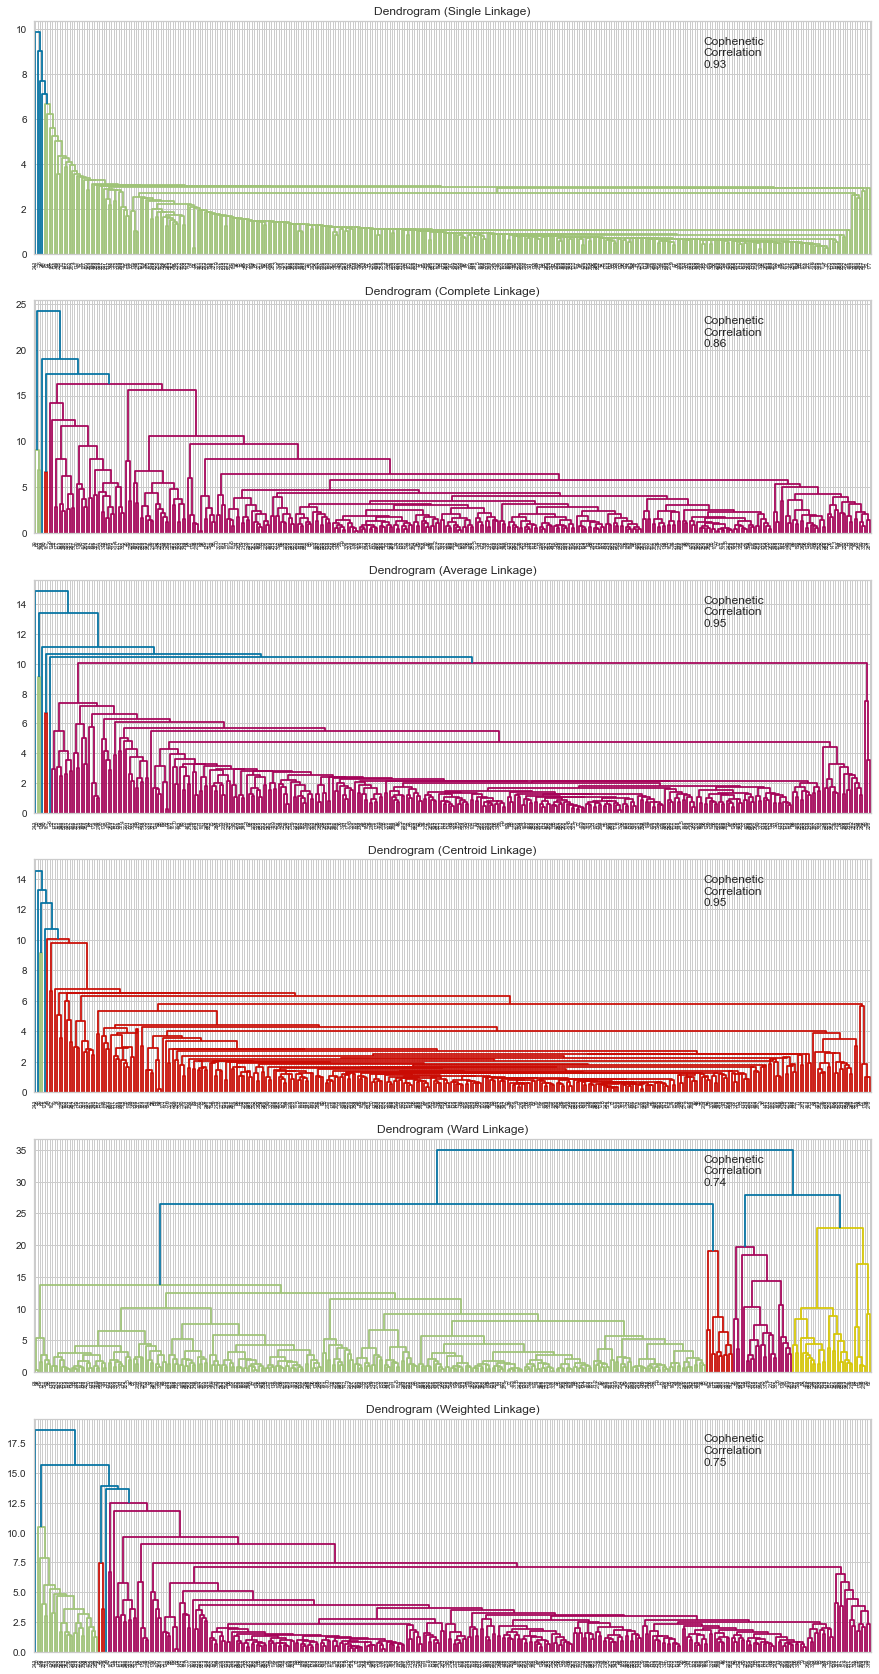

In [34]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

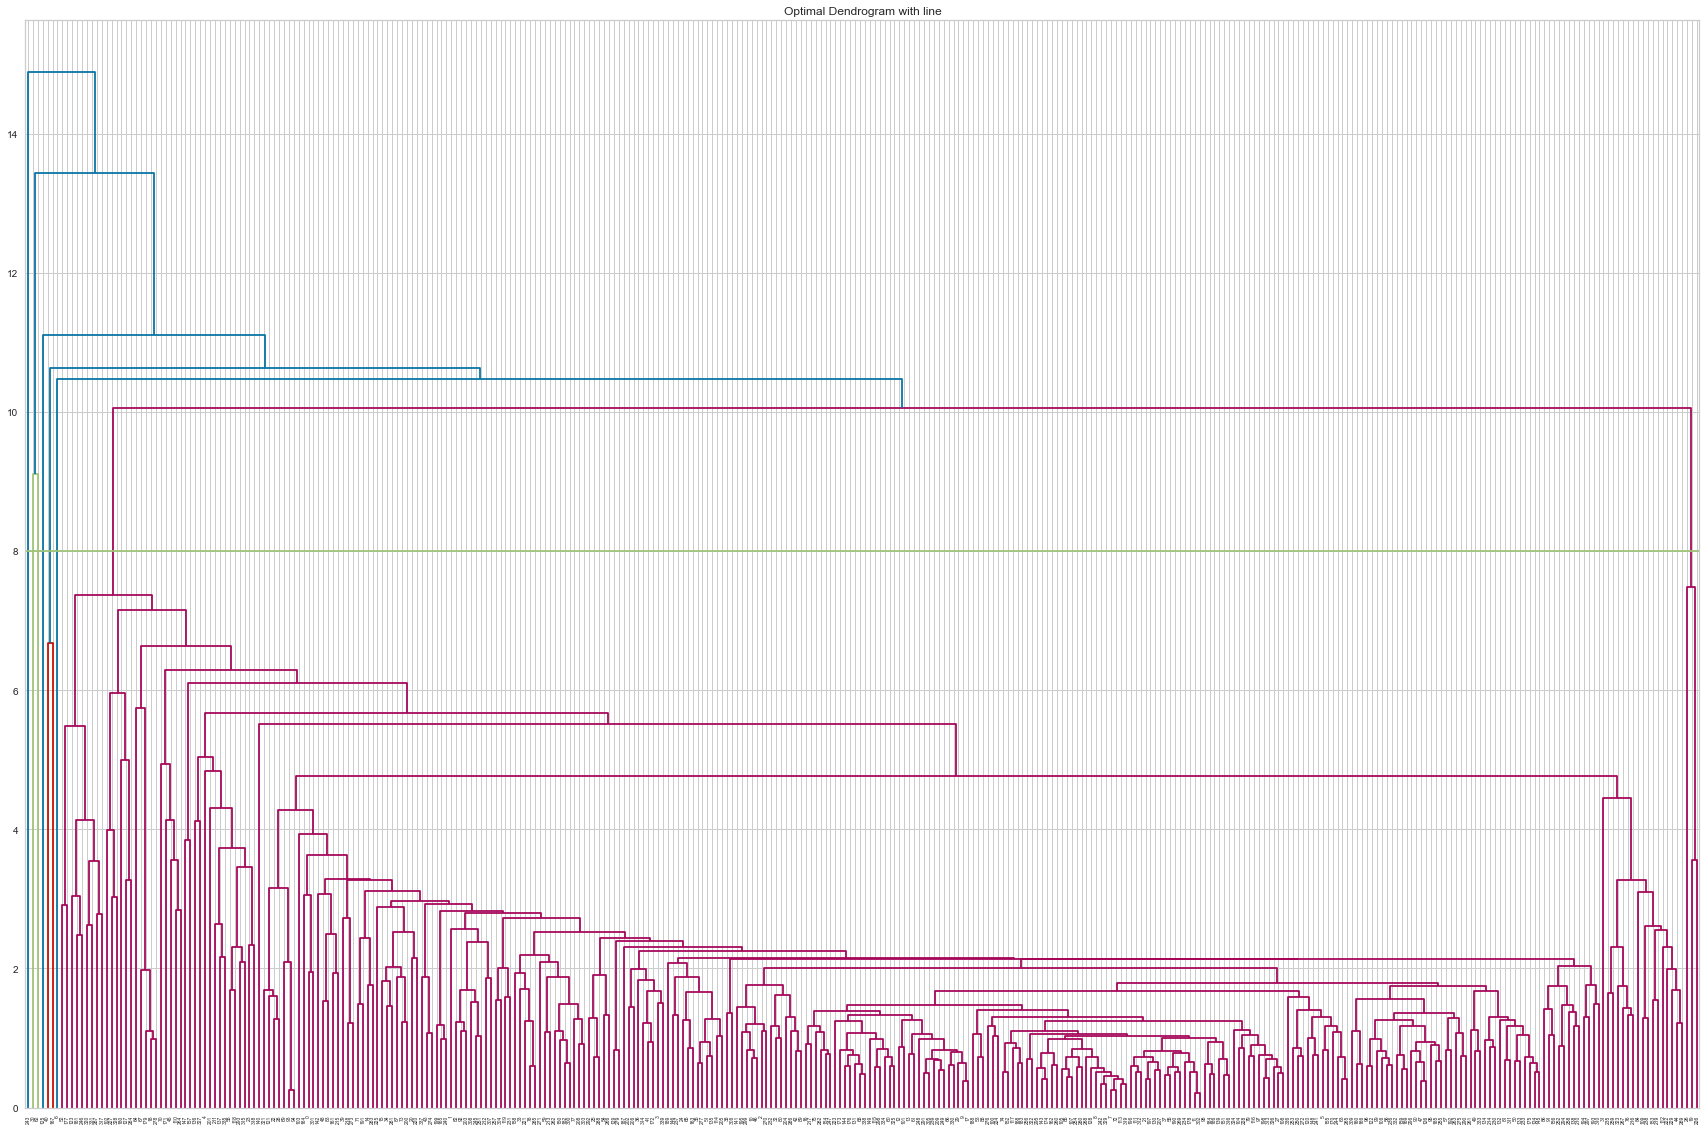

In [35]:
plt.figure(figsize=(30,20))
plt.title("Optimal Dendrogram with line")
Z = linkage(subset_scaled_df, metric="euclidean", method="average")

dendrogram(Z)
plt.axhline(y = 8, color = 'g', linestyle = '-');
plt.xticks(rotation=90);

#### Observations
* From the dendogram,at a distance of 8 units, there are 8 distinct clusters.

In [36]:
# Building an agglomeratice cluster model with the number of clusters equal to 8
h_clust_start=time.time()
HCmodel = AgglomerativeClustering(n_clusters=8, affinity="euclidean", linkage="average")
HCmodel.fit(subset_scaled_df)
h_clust_end=time.time()

In [37]:
# adding hierarchical cluster labels to the original and scaled dataframes

subset_scaled_df["HC_Clusters"] = HCmodel.labels_
data["HC_Clusters"] = HCmodel.labels_


### Cluster Profiling

In [38]:
cluster_profile = data.groupby("HC_Clusters").mean()
cluster_profile["count_in_each_segments"] = (
    data.groupby("HC_Clusters")["GICS_Sector"].count().values
)
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio,K_means_segments,count_in_each_segments
HC_Clusters,,,,,,,,,,,,,
0,327.006671,21.917380,2.029752,4.000000,106.000000,698240666.666667,287547000.000000,0.750000,366763235.300000,400.989188,-5.322376,2.666667,3
1,25.640000,11.237908,1.322355,12.500000,130.500000,16755500000.000000,13654000000.000000,3.295000,2791829362.100000,13.649696,1.508484,2.000000,2
2,75.017416,3.937751,1.513415,35.621212,66.545455,-39846757.575758,1549443100.000000,2.904682,562266326.402576,29.091275,-2.146308,0.348485,330
3,104.660004,16.224320,1.320606,8.000000,958.000000,592000000.000000,3669000000.000000,1.310000,2800763359.000000,79.893133,5.884467,3.000000,1
4,1274.949951,3.190527,1.268340,29.000000,184.000000,-1671386000.000000,2551360000.000000,50.090000,50935516.070000,25.453183,-1.052429,3.000000,1
5,276.570007,6.189286,1.116976,30.000000,25.000000,90885000.000000,596541000.000000,8.910000,66951851.850000,31.040405,129.064585,3.000000,1
6,4.500000,-38.101788,4.559815,687.000000,22.000000,-3283000000.000000,-14685000000.000000,-22.430000,654703522.100000,28.407929,-1.840528,2.000000,1
7,44.470001,11.397804,2.405408,917.000000,80.000000,698000000.000000,-23528000000.000000,-61.200000,384444444.400000,93.089287,4.970809,2.000000,1


In [39]:
#Print the subsectors in each cluster
# let's see the names of the subsectors in each cluster
for cl in data["HC_Clusters"].unique():
    print("In cluster {}, the following Sub-Sectors are present:".format(cl))
    print(data[data["HC_Clusters"] == cl]["GICS_Sector"].value_counts(normalize=True))
    print()

In cluster 2, the following Sub-Sectors are present:
Industrials                    0.160606
Financials                     0.145455
Health Care                    0.118182
Consumer Discretionary         0.115152
Information Technology         0.087879
Energy                         0.084848
Real Estate                    0.081818
Utilities                      0.072727
Materials                      0.060606
Consumer Staples               0.057576
Telecommunications Services    0.015152
Name: GICS_Sector, dtype: float64

In cluster 5, the following Sub-Sectors are present:
Information Technology    1.0
Name: GICS_Sector, dtype: float64

In cluster 0, the following Sub-Sectors are present:
Information Technology    0.333333
Consumer Discretionary    0.333333
Health Care               0.333333
Name: GICS_Sector, dtype: float64

In cluster 7, the following Sub-Sectors are present:
Energy    1.0
Name: GICS_Sector, dtype: float64

In cluster 1, the following Sub-Sectors are present:
Financ

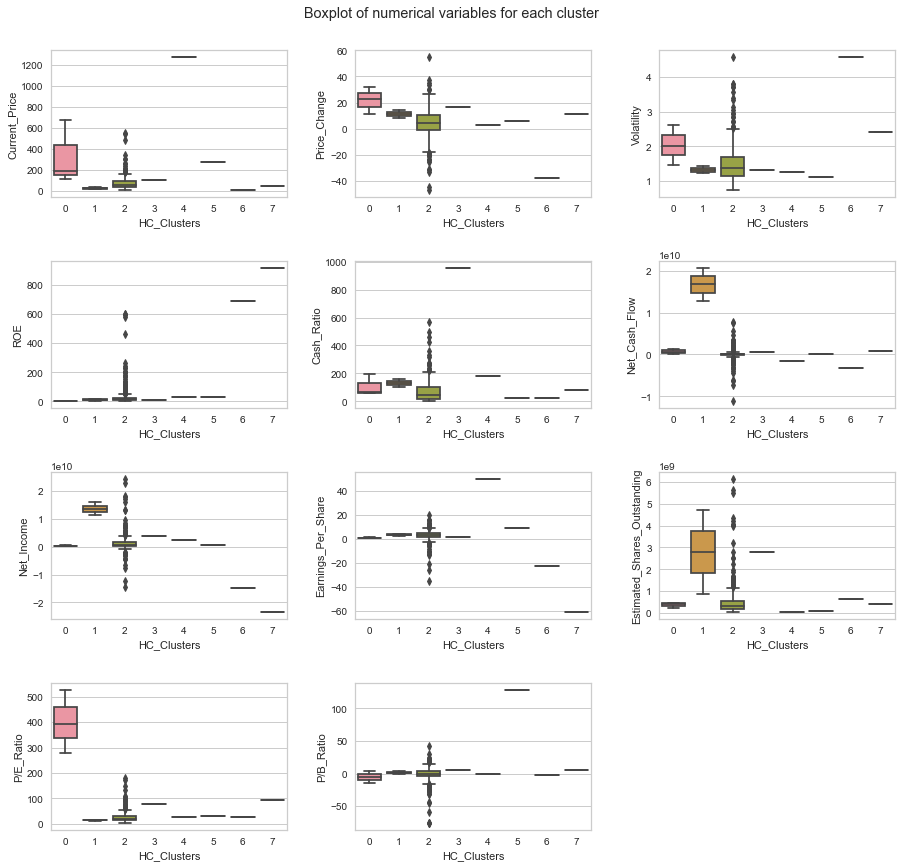

In [40]:
plt.figure(figsize=(13, 15))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(5, 3,i+1)
    sns.boxplot(data=data, x="HC_Clusters", y=variable)

plt.tight_layout(pad=2.0);

#### Observations
* Cluster 0: Highest Price change and P/E ratio but only contains 3 members in the cluster
* Cluster 1: Highest net cash flow which in turns leads to it having the highest net cash income of all the clusters
* Cluster 2: Most diverse cluster with the highest number of sectors covered in this sector
* Cluster 3: Highest average current stock price and in turn the highest earnings per share
* Cluster 4: Highest Cash ratio and the highest number of shares owned by its shareholders
* Cluster 5: Highest P/B ratio
* Cluster 6: Highest average deviation fromm the mean share price.
* Cluster 7: Higest return on equity



## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

In [41]:
#Comparing the speeds of the two
k_means_time=k_means_end-k_means_start
h_clust_time=h_clust_end-h_clust_start
print("The time taken to create a K-means cluster model is ", k_means_time)
print("The time taken to create a Agglomerative cluster model is ", h_clust_time)

The time taken to create a K-means cluster model is  0.3863246440887451
The time taken to create a Agglomerative cluster model is  0.008028745651245117


#### Observaions
* K-means clustering took a longer time to build its models. Noted that it only had to build 4 clusters while agglomerative cluster had to make 8 clusters.
* While agglomerative clustering gave 8 clusters, 5 of the clusters only had 1 sector. When investing in 1 single sector, the risks increase due to lack of diversified portfolio.
* K-means cluster model produces 4 distinct cluster with more than 10 members in each cluster. Resulting in a diversified portfolio
* K-means model is therefore chosen

## Actionable Insights and Recommendations

* As per the k-mode, the 4 clusters can be described as follows:
    - Cluster 0:**Very Low Risk**. This cluster has the highest number of sectors. This spreads the investement and risk and in return gives up high earnings per share. This is due to the aggregation of those that are making profits and those that are making losses.This is ideal for more than 6 months(medium length) of investments. 
    - Cluster 1:**High Risk**. This cluster has the highest avergae stock price flactuations. However the companies in this cluster have the highest return on equity. This implies they have been able to channel their finances to assets which could be used at any time to repay its debts.
    - Cluster 2:**Medium Risk**. This cluster has the highest the highest earnings per share of all the clusters but also has the highest positive average stock price change out of all the clusters. Ideal for short term returns
    - Cluster 3: **Low Risk**. Companies in this cluster have good financial perfomance evidenced by the highest average net income. The shares of the companies is rarely traded as it has the highest number of stocks owned by its shareholders.This is ideal for very long term investments where dividends is collected at the end of the financial year.

### PCA for visualisation

In [42]:
subset_scaled_df.shape

(340, 13)

In [43]:
# importing library
from sklearn.decomposition import PCA

# setting the number of components to equal the number of columns
pca = PCA(n_components=12)

# transforming data and storing results in a dataframe
pca.fit(subset_scaled_df)

PCA(n_components=12)

In [44]:
print(pca.explained_variance_)

[2.62789468 1.97701913 1.46045988 1.13943417 1.09969321 1.00006574
 0.86427118 0.72682977 0.49329914 0.31007325 0.19945967 0.11085816]


In [45]:
print(pca.explained_variance_ratio_)

[0.21753623 0.16365697 0.12089637 0.09432197 0.09103223 0.0827851
 0.07154408 0.06016672 0.04083514 0.02566776 0.0165112  0.0091768 ]


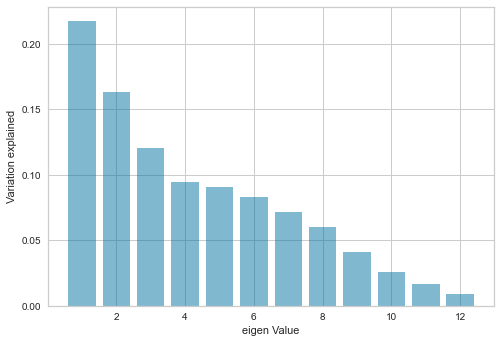

In [46]:
plt.bar(list(range(1,13)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

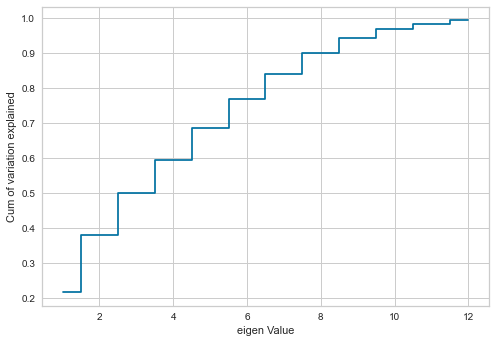

In [47]:
plt.step(list(range(1,13)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

#### Observation
* The first 9 principal components are responsible for approximately 95% of the variance. 


### Dimension Reductionality

In [48]:
pca9 = PCA(n_components=9)
pca9.fit(subset_scaled_df)

print(pca9.explained_variance_ratio_)


[0.21753623 0.16365697 0.12089637 0.09432197 0.09103223 0.0827851
 0.07154408 0.06016672 0.04083514]


In [49]:
Xpca9 = pca9.transform(subset_scaled_df)
# transforming data and storing results in a dataframe
reduced_df_pca9 = pd.DataFrame(
    data=Xpca9
)
reduced_df_pca9.sample(10)

,0,1,2,3,4,5,6,7,8
293,0.601703,2.695444,0.146856,1.735718,0.118597,0.695688,-1.172257,-0.843570,1.206049
225,0.954516,0.654108,-0.520853,0.199869,0.923703,-0.125469,-0.909044,-0.643903,0.949724
318,0.252150,4.201492,0.105535,1.772929,1.485236,-1.505071,-0.608132,-1.425036,-0.743103
162,-0.101057,-0.744771,0.613319,-0.234432,0.074682,-0.160955,0.254629,0.284031,-0.585470
228,-0.265656,-0.958385,0.252807,0.012196,-0.032271,0.605256,-0.279151,-0.100454,-0.274242
59,0.820362,-0.992192,0.013598,-1.315403,0.045792,-1.058317,-0.265202,-0.253567,0.557329
209,-0.643146,-0.312406,0.053955,0.489713,0.126979,-0.203283,-0.388549,-0.235950,-0.518379
87,-0.880147,0.166458,0.086138,1.691223,-0.599367,0.079840,-1.439353,0.333328,1.612453
213,1.174676,-0.623876,-0.391655,-1.539585,0.544612,-1.291945,-0.166581,-0.294111,0.917626
92,-1.738738,-0.024447,-1.182937,-0.428338,-0.384408,0.185382,0.724891,0.685713,-0.137920


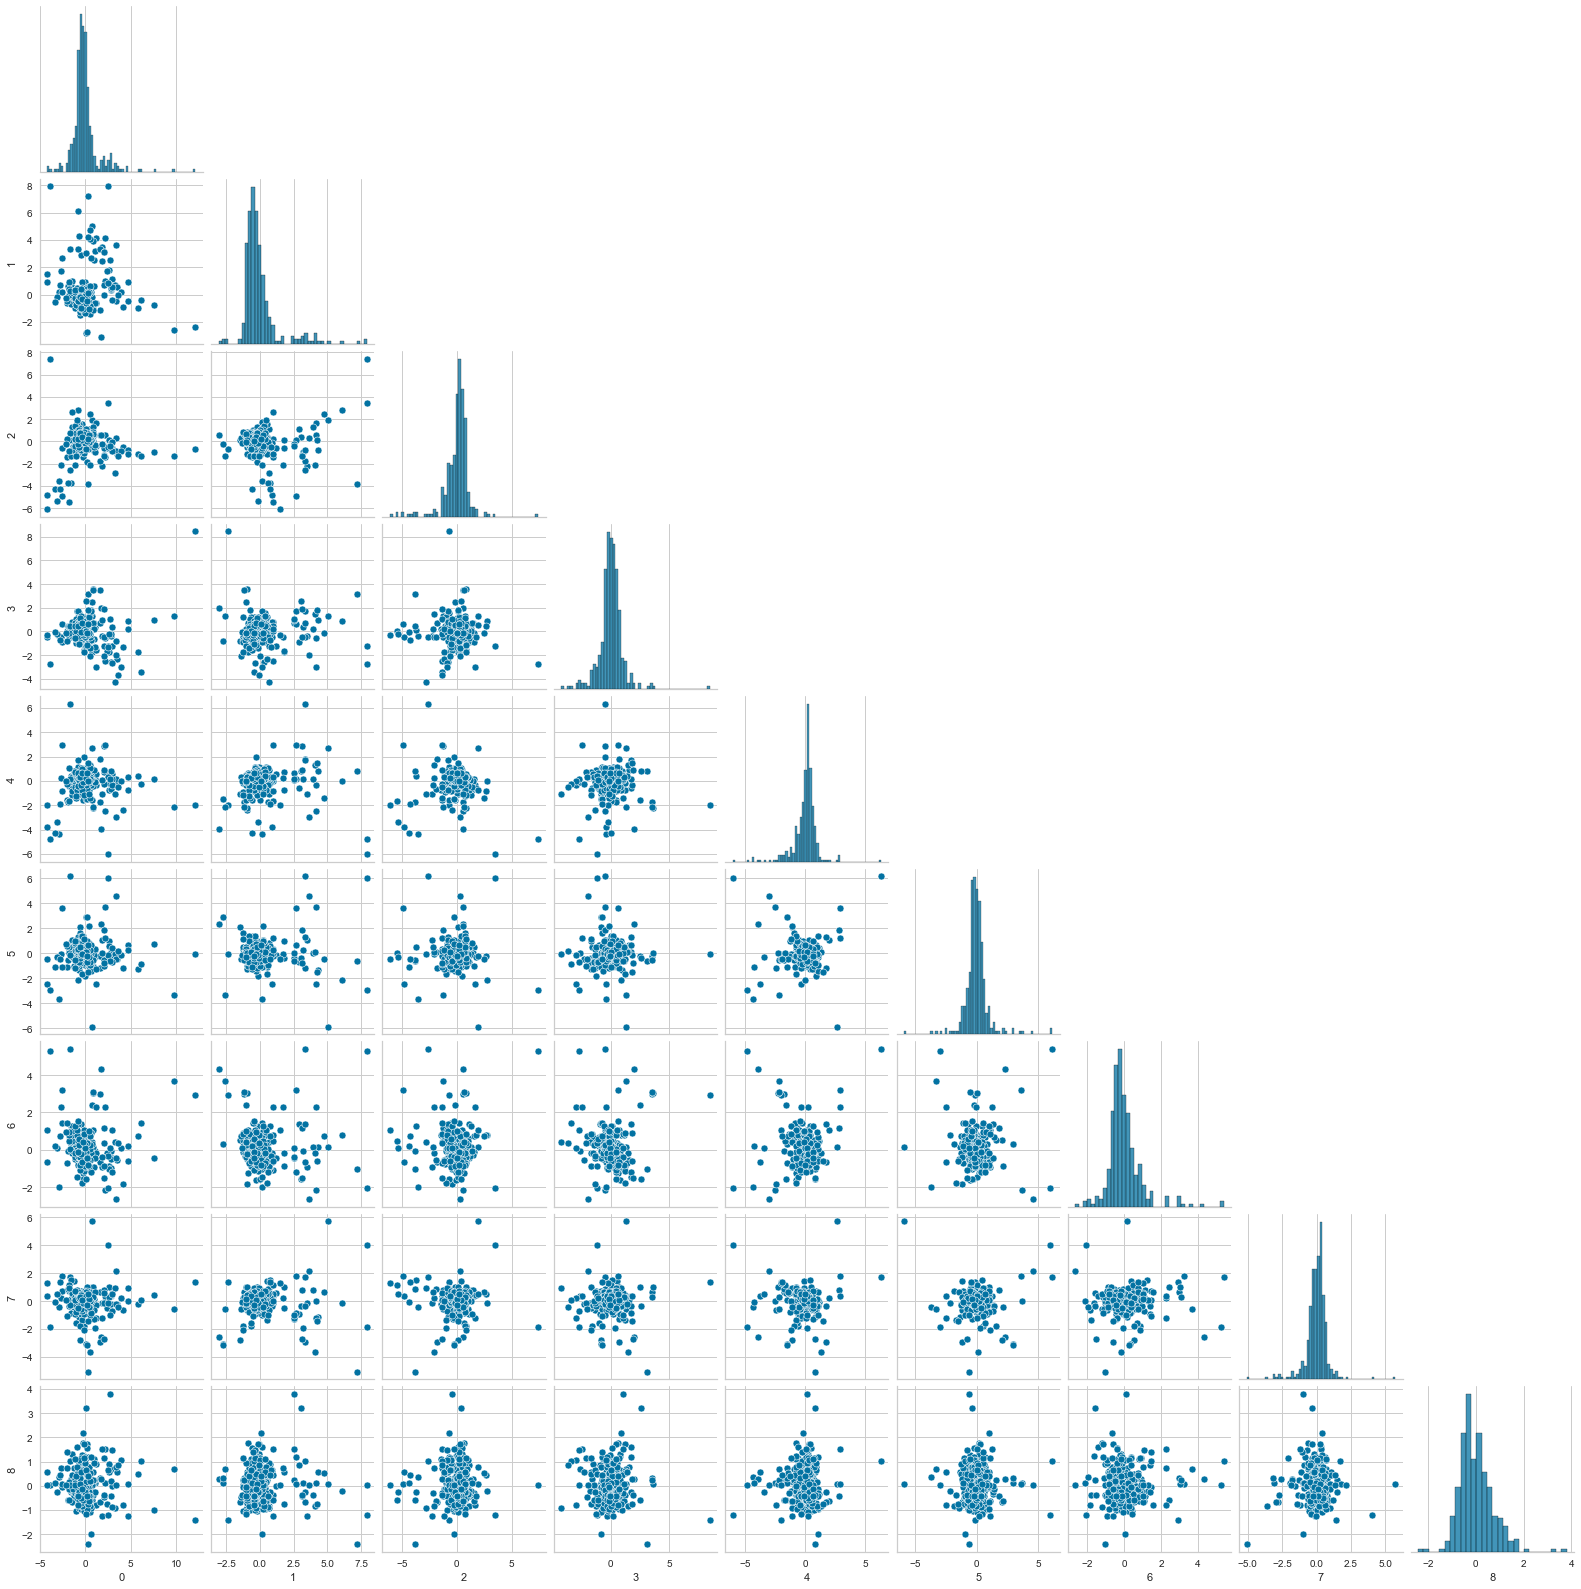

In [50]:
sns.pairplot(reduced_df_pca9, corner=True);
